# AirBnB

We will do some data analysis and predict the price of an AirBnB listing as a function of its attributes. 

We download the dataset from kaggle: https://www.kaggle.com/c/airbnblala/data#

In [1]:
# Install required libraries
!pip install statsmodels
# !pip install basemap
!pip install wordcloud
# !pip install basemap-data-hires

In [2]:
import statsmodels.api as sm

In [3]:
# Install required libraries
# !pip install basemap
!pip install wordcloud
# !pip install basemap-data-hires
!pip install keras
!pip install tensorflow
!pip install xgboost

In [1]:
# Import all of the modules we need.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline
import random as rand
import itertools
import seaborn as sns

# from mpl_toolkits.basemap import Basemap

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = [12,10]
import warnings
warnings.filterwarnings("ignore")

# Data Preliminary Observations

In [2]:
data = pd.read_csv("analysisData.csv")  # Load in the downloaded csv file 

In [3]:
data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,20091785,https://www.airbnb.com/rooms/20091785,20180303203649,2018-03-05,"Cozy Stay in Queens, Easy Access to Manhattan","A perfect spot for an intern, student or out o...",NaN,"A perfect spot for an intern, student or out o...",none,We're right next to the best Indian food in Qu...,...,f,NaN,NaN,t,f,flexible,f,f,1,0.42
1,3710661,https://www.airbnb.com/rooms/3710661,20180303203649,2018-03-04,Spacious room in comfortable apt.,"Nice size apt 15 minutes from central park, a...",This is a private room in a two bedroom apartm...,"Nice size apt 15 minutes from central park, a...",none,The apartment is conveniently located on the b...,...,f,NaN,NaN,t,f,moderate,f,f,3,2.33
2,15055244,https://www.airbnb.com/rooms/15055244,20180303203649,2018-03-04,Fresh Clean & Modern: Williamsburg at its Best,**This listing would normally be $160 per nigh...,Construction on this mid-sized building was co...,**This listing would normally be $160 per nigh...,none,Williamsburg is bursting with culture. Come se...,...,f,NaN,NaN,f,f,moderate,f,f,1,1.10
3,19640913,https://www.airbnb.com/rooms/19640913,20180303203649,2018-03-05,Cozy Room In Perfect Location!,This is cozy room near all major transportatio...,NaN,This is cozy room near all major transportatio...,none,NaN,...,f,NaN,NaN,t,f,flexible,f,f,1,1.00
4,11888948,https://www.airbnb.com/rooms/11888948,20180303203649,2018-03-05,Charming Central Park Studio,"Charming, elegant studio located 1/2 block fro...","Very charming, clean studio in the most expens...","Charming, elegant studio located 1/2 block fro...",none,NaN,...,f,NaN,NaN,f,f,moderate,f,f,1,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29137,15930864,https://www.airbnb.com/rooms/15930864,20180303203649,2018-03-05,Beautiful 1- bdrm apt in tranquil Inwood building,If you are visiting NYC or surrounding areas a...,Perfect setup for a small family (3-4) or a co...,If you are visiting NYC or surrounding areas a...,none,The location of this apartment in one of a kin...,...,f,NaN,NaN,f,f,moderate,f,f,1,1.29
29138,21161871,https://www.airbnb.com/rooms/21161871,20180303203649,2018-03-04,Entire apartment in Turtle Bay,Our place is on the 4th floor of an elevator b...,NaN,Our place is on the 4th floor of an elevator b...,none,"We're two blocks from a 24 hour supermarket, 1...",...,f,NaN,NaN,f,f,strict,t,t,2,1.05
29139,13623891,https://www.airbnb.com/rooms/13623891,20180303203649,2018-03-05,Stunning Studio in Midtown BEST LOCATION,Beautiful studio in the heart of Manhattan. Pe...,NaN,Beautiful studio in the heart of Manhattan. Pe...,none,Times Square Empire State Building Madison Squ...,...,f,NaN,NaN,t,f,strict,f,f,1,2.82
29140,18975009,https://www.airbnb.com/rooms/18975009,20180303203649,2018-03-05,"Xmas, New Year in NY: Cozy Room In Sunny Apart...",Weekly Holidays Special Short term per week Ch...,"Cozy private room with comfy bed, full wall of...",Weekly Holidays Special Short term per week Ch...,none,Mid-East Manhattan: easy walk /bike /hike to m...,...,f,NaN,NaN,f,f,strict,f,f,1,0.56


In [4]:
# list of each columns together with its datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                29142 non-null  int64  
 1   listing_url                       29142 non-null  object 
 2   scrape_id                         29142 non-null  int64  
 3   last_scraped                      29142 non-null  object 
 4   name                              29137 non-null  object 
 5   summary                           28271 non-null  object 
 6   space                             21854 non-null  object 
 7   description                       29130 non-null  object 
 8   experiences_offered               29142 non-null  object 
 9   neighborhood_overview             19102 non-null  object 
 10  notes                             12593 non-null  object 
 11  transit                           20155 non-null  object 
 12  acce

In [5]:
# Drop duplicated values
data.drop_duplicates(subset =["id"], inplace = True)

In [6]:
# Number of Missing Values
data.isnull().sum()[data.isnull().sum() != 0]

name                         5
summary                    871
space                     7288
description                 12
neighborhood_overview    10040
notes                    16549
transit                   8987
access                   10231
interaction              10798
house_rules               9915
thumbnail_url            29142
medium_url               29142
xl_picture_url           29142
host_location               76
host_about                9965
host_response_time        8000
host_response_rate        8000
host_acceptance_rate     29142
host_neighbourhood        3778
neighbourhood                8
city                        36
state                        1
zipcode                    351
market                      84
beds                        17
square_feet              28801
weekly_price             25307
monthly_price            28901
security_deposit         11827
cleaning_fee              5702
license                  29142
jurisdiction_names       29140
dtype: i

In [7]:
# Columns with at least 1 missing values
data.columns[data.isnull().sum()>0]

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'neighbourhood', 'city',
       'state', 'zipcode', 'market', 'beds', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'license',
       'jurisdiction_names'],
      dtype='object')

In [8]:
# Columns with more than 50% missing values, which we won't use in our analysis
data[data.columns[data.isnull().sum()>0.5*len(data)]].columns

Index(['notes', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price',
       'license', 'jurisdiction_names'],
      dtype='object')

In [9]:
df = data.loc[:,~data.columns.isin(data.columns[data.isnull().sum()>0.5*len(data)].tolist())]
df.shape

(29142, 86)

In [10]:
df = df[df["price"] > 0]
df = df[~((df["bedrooms"] == 0) & (df["bathrooms"] > 1))]
df.city = df.city.apply(lambda x: str(x).lower().strip())

df.shape

(29087, 86)

In [11]:
ny_zipcodes = {"Manhattan": list((10001, 10282)), "Staten Island": list((10283, 10314)), "Bronx": list((10315, 10980)), "Brooklyn":list((10981, 11256)), "Queens": list((11257, 11799))} 
df = df[~(df.zipcode.isna())]
df = df[~(df.zipcode == '1m')]
df.zipcode = df.zipcode.apply(lambda x: int(str(x)[:5]))
df = df[(df.zipcode >= 10001) & (df.zipcode <= 11799)]
df = df.reset_index(drop = True)

for i in range(len(df)):
    c = ny_zipcodes.keys()
    for a in c:
        b = ny_zipcodes.get(a)
        if (int(df.loc[i, "zipcode"]) >= b[0]) & int((df.loc[i, "zipcode"]) <= b[1]):
            df.loc[i, "city"] = a




In [12]:
df.city.value_counts()

Brooklyn         13269
Manhattan        12961
Queens            1800
Bronx              546
Staten Island      155
Name: city, dtype: int64

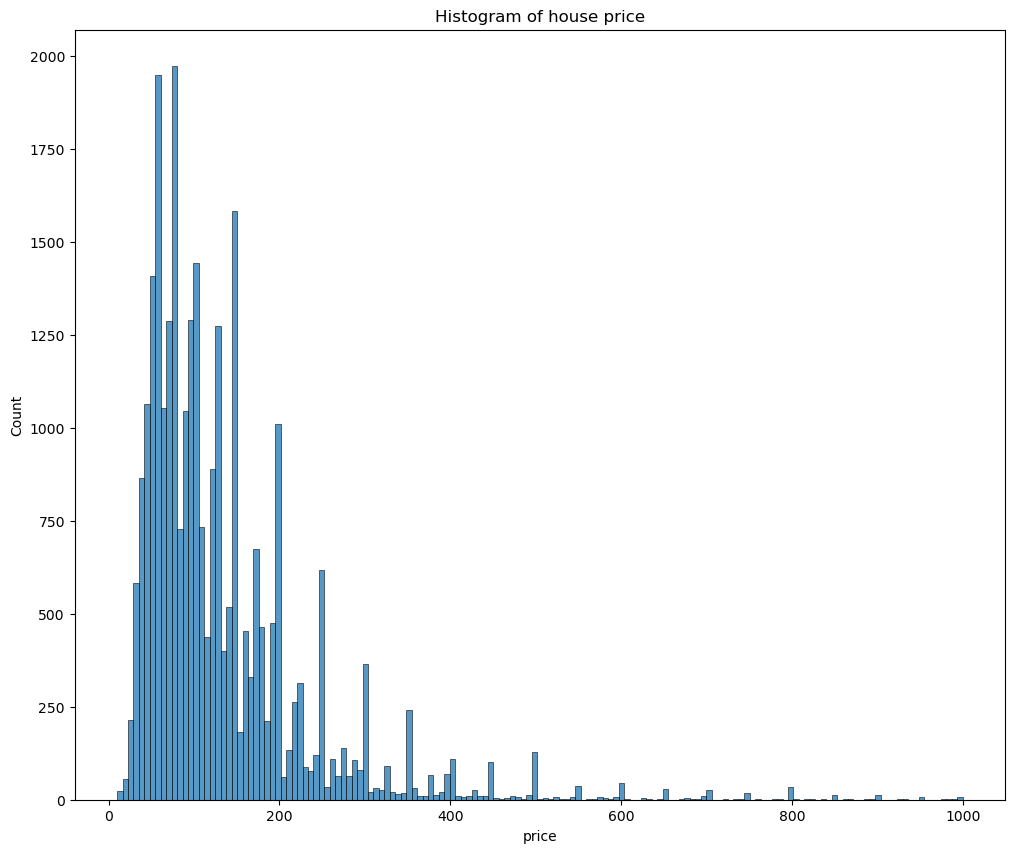

In [13]:
sns.histplot(x = (df[df["price"]>0]["price"])).set(title = 'Histogram of house price');

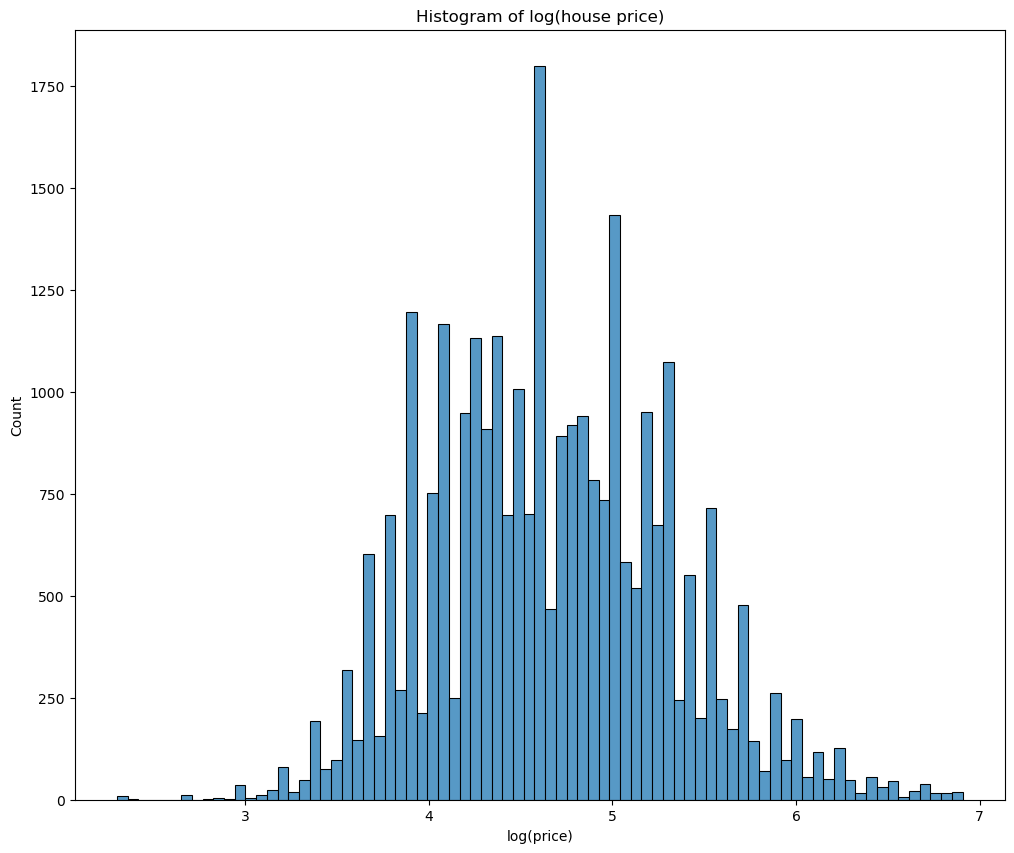

In [14]:
sns.histplot(x = np.log(df[df["price"]>0]["price"])).set(title = 'Histogram of log(house price)');
plt.xlabel('log(price)');

In [15]:
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

name                         5
summary                    866
space                     7156
description                 12
neighborhood_overview     9855
transit                   8830
access                   10061
interaction              10621
house_rules               9708
host_location               76
host_about                9787
host_response_time        7872
host_response_rate        7872
host_neighbourhood        3479
neighbourhood                7
state                        1
market                      84
beds                        16
security_deposit         11692
cleaning_fee              5643
dtype: int64

In [16]:
df["name"] #directly delete the name column

0            Cozy Stay in Queens, Easy Access to Manhattan
1                        Spacious room in comfortable apt.
2           Fresh Clean & Modern: Williamsburg at its Best
3                           Cozy Room In Perfect Location!
4                             Charming Central Park Studio
                               ...                        
28726    Beautiful 1- bdrm apt in tranquil Inwood building
28727                       Entire apartment in Turtle Bay
28728             Stunning Studio in Midtown BEST LOCATION
28729    Xmas, New Year in NY: Cozy Room In Sunny Apart...
28730                        Lovely Bright Upper East Side
Name: name, Length: 28731, dtype: object

In [17]:
df["summary"] #Since we only do the word cloud for summary, space, description, neighborhood_overview, transit, access, interaction, house_rules columns, we can just leave it as null.

0        A perfect spot for an intern, student or out o...
1        Nice size apt  15 minutes from central park, a...
2        **This listing would normally be $160 per nigh...
3        This is cozy room near all major transportatio...
4        Charming, elegant studio located 1/2 block fro...
                               ...                        
28726    If you are visiting NYC or surrounding areas a...
28727    Our place is on the 4th floor of an elevator b...
28728    Beautiful studio in the heart of Manhattan. Pe...
28729    Weekly Holidays Special Short term per week Ch...
28730    We are a true home. Bordering the Upper East S...
Name: summary, Length: 28731, dtype: object

In [18]:
df["host_location"]  #Since we have filled the city column according to zipcode, we can just delete this column.

0        New York, New York, United States
1        New York, New York, United States
2         Sarasota, Florida, United States
3        New York, New York, United States
4        New York, New York, United States
                       ...                
28726    New York, New York, United States
28727    New York, New York, United States
28728    New York, New York, United States
28729                                   US
28730    New York, New York, United States
Name: host_location, Length: 28731, dtype: object

In [19]:
df["host_about"] # Delete this column since it has more than 40% of missing value and its info is somehow included in summary column.

0        I am a published playwright and novelist livin...
1        I have been living in New York for 9years, I l...
2        Hello, bonjour!  We are Ellen (I'm originally ...
3                                                      NaN
4                                                      NaN
                               ...                        
28726    Hello!  Thanks for checking out my apartment r...
28727    In a word, we're awesome! I'm a graphic design...
28728                                                  NaN
28729    I am a sustainable architecture professional a...
28730    Hi, I'm Dorothy, and my partner is Ian. We are...
Name: host_about, Length: 28731, dtype: object

In [20]:
df["host_response_time"] # No decent way we can fill it in.

0                   NaN
1        within an hour
2          within a day
3          within a day
4          within a day
              ...      
28726    within an hour
28727    within an hour
28728    within an hour
28729      within a day
28730    within an hour
Name: host_response_time, Length: 28731, dtype: object

In [21]:
df["host_response_rate"] # No decent way we can fill it in.

0         NaN
1        100%
2        100%
3        100%
4         60%
         ... 
28726    100%
28727    100%
28728     94%
28729     50%
28730    100%
Name: host_response_rate, Length: 28731, dtype: object

In [22]:
df["host_neighbourhood"] # No way we can fill it in 

0          Jackson Heights
1              East Harlem
2             Williamsburg
3                      NaN
4          Upper East Side
               ...        
28726                  NaN
28727         Williamsburg
28728    Flatiron District
28729    Flatiron District
28730          East Harlem
Name: host_neighbourhood, Length: 28731, dtype: object

In [23]:
df["neighbourhood"] # No way we can fill it in 

0           Jackson Heights
1               East Harlem
2              Williamsburg
3        Washington Heights
4           Upper East Side
                ...        
28726                Inwood
28727          Midtown East
28728     Flatiron District
28729     Flatiron District
28730           East Harlem
Name: neighbourhood, Length: 28731, dtype: object

In [24]:
df["state"] =  df["state"].fillna("NY") # We can just fill in as NY

In [25]:
df["market"] =  df["market"].fillna("New York") # We can just fill in as New York

In [26]:
# Fill NA for beds
def custom_beds_mean(df_new, original_df):
    output = df_new[(df_new.bedrooms == original_df.bedrooms) & (df_new.room_type == original_df.room_type)].beds
    return round(np.mean(output))


D = df[df["beds"].isnull()]
df_new = df[~df["beds"].isnull()]
temp_l = []
for i in range(len(D)):
    temp_v = custom_beds_mean(df_new, D.iloc[i, :])
    temp_l.append(temp_v)
    
print(temp_l)
df["beds"] = df["beds"].fillna(1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
# Fill NA for security_deposit
name = df.city.unique().tolist()
df_new = df[~df["security_deposit"].isnull()]
for i in range(len(name)):
    mean_value = round(np.mean(df_new.security_deposit[df_new.city == name[i]]))
    index = df[(df["city"] ==  name[i]) & (df["security_deposit"].isnull())].index.tolist()
    df.loc[index,"security_deposit"] = mean_value

df.reset_index(drop = True, inplace = True)

In [28]:
# Fill NA for beds
df_new = df[~df["cleaning_fee"].isnull()]

for i in df["bedrooms"].unique().tolist():
    for j in df["bathrooms"].unique().tolist():
        mean_value = np.mean(df_new["cleaning_fee"][(abs(df_new["bedrooms"] - i) < 0.05) & (abs(df_new["bathrooms"] - j) < 0.05)])
        index = df[(df["bedrooms"] == i) & (df["bathrooms"] == j) & (df["cleaning_fee"].isnull())].index.tolist()
        df.loc[index,"cleaning_fee"] = mean_value
        
df.reset_index(drop = True, inplace = True)

In [30]:
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

name                         5
summary                    866
space                     7156
description                 12
neighborhood_overview     9855
transit                   8830
access                   10061
interaction              10621
house_rules               9707
host_location               76
host_about                9787
host_response_time        7872
host_response_rate        7872
host_neighbourhood        3479
neighbourhood                7
dtype: int64

# Data Analysis

## BaseMap

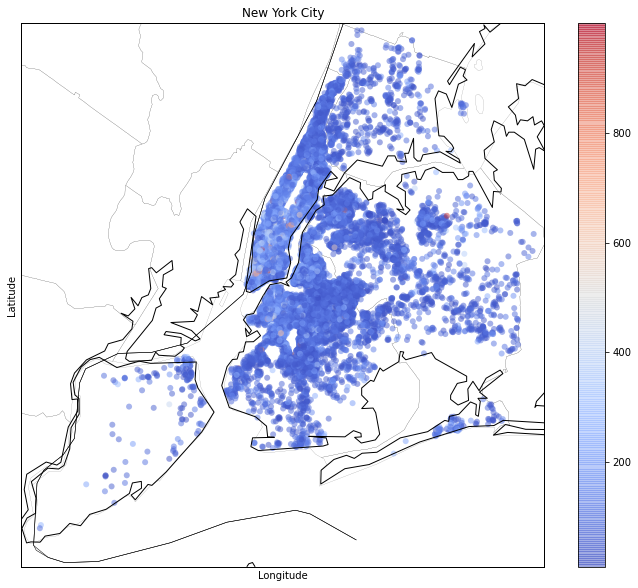

In [66]:
nyc_lat1 = 40.477399
nyc_lon1 = -74.259090
nyc_lat2 = 40.917577
nyc_lon2 = -73.700272


# Create the Basemap object
m = Basemap(projection='merc', llcrnrlat=nyc_lat1, urcrnrlat=nyc_lat2, llcrnrlon=nyc_lon1, urcrnrlon=nyc_lon2, resolution='h')

# Draw the coastlines, states, and countries

m.drawmapboundary()  
m.drawstates()        
m.drawcoastlines()   
m.drawcountries()   
m.drawcounties()   
m.drawmapboundary(fill_color='white')

# Plot the basemap
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, c=df['price'].values, cmap='coolwarm', alpha=0.5, edgecolors='none')

# Add title and axis labels
plt.title('New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the map
plt.colorbar();
plt.show();

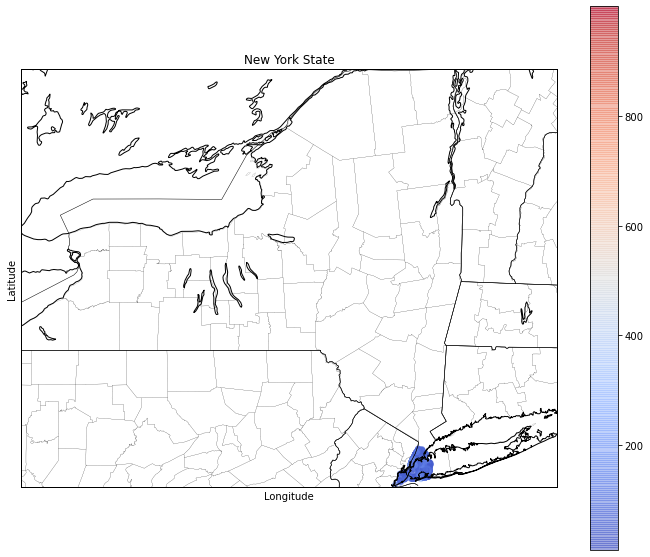

In [67]:
ny_lat1 = 40.477399
ny_lon1 = -79.762590
ny_lat2 = 45.015865
ny_lon2 = -71.851598

# Create the Basemap object
m = Basemap(projection='merc', llcrnrlat=ny_lat1, urcrnrlat=ny_lat2, llcrnrlon=ny_lon1, urcrnrlon=ny_lon2, resolution='h')

# Draw the coastlines, states, and countries

m.drawmapboundary()  
m.drawstates()        
m.drawcoastlines()   
m.drawcountries()   
m.drawcounties()   
m.drawmapboundary(fill_color='white')

# Plot the basemap
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, c=df['price'].values, cmap='coolwarm', alpha=0.5, edgecolors='none')

# Add title and axis labels
plt.title('New York State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the map
plt.colorbar();
plt.show();

## WordCloud

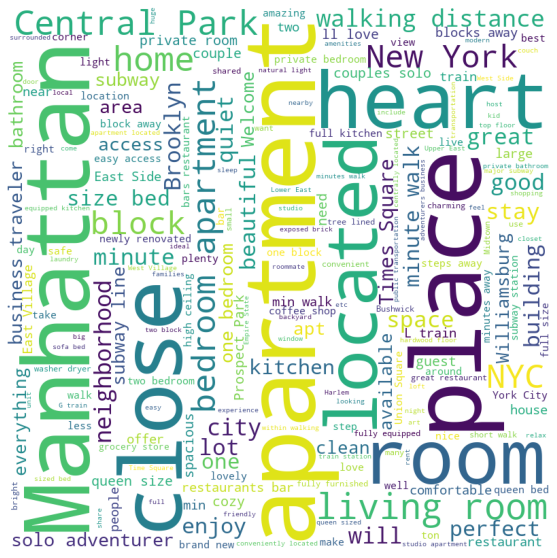

In [68]:
# Do analysis on the "summary" column
text=''.join(str(i) for i in df["summary"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.imshow(wordcloud)
plt.axis('off')

# Show the plot
plt.show()

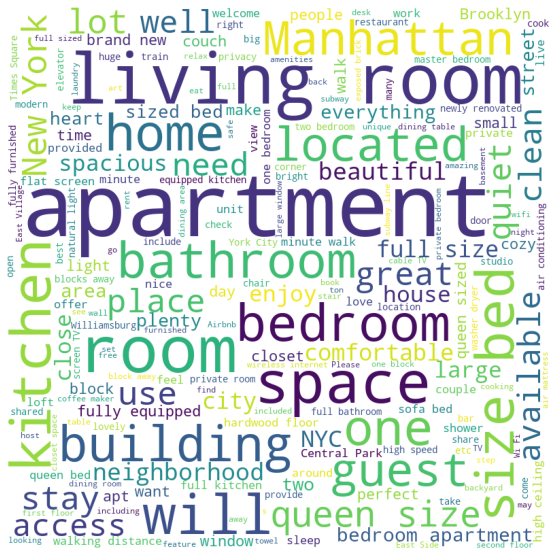

In [69]:
# Do analysis on the "space" column
text=''.join(str(i) for i in df["space"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.imshow(wordcloud)
plt.axis('off')

# Show the plot
plt.show()

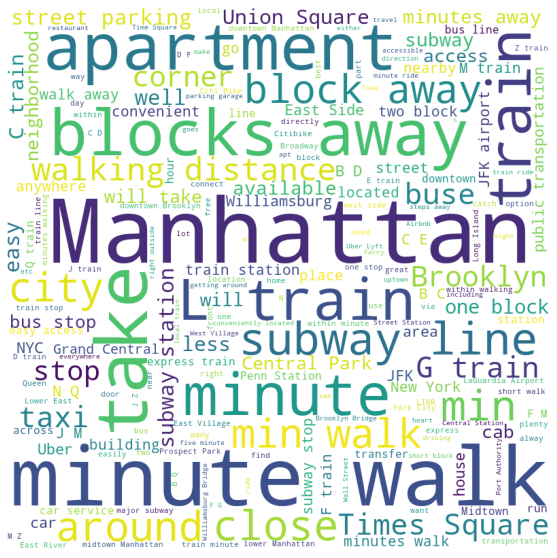

In [70]:
# Do analysis on the "transit" column
text=''.join(str(i) for i in df["transit"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.imshow(wordcloud)
plt.axis('off')

# Show the plot
plt.show()

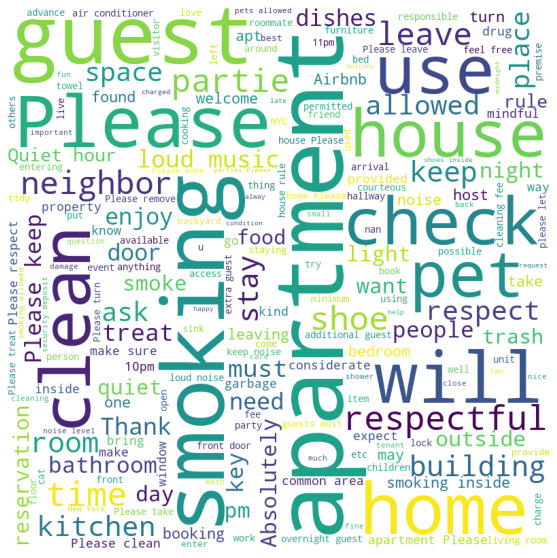

In [71]:
# Do analysis on the "house_rules" column
text=''.join(str(i) for i in df["house_rules"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the word cloud
plt.imshow(wordcloud)
plt.axis('off')

# Show the plot
plt.show()

In [72]:
# Do analysis on the "amenities" column
Counter_dict = {}
for amendities_dict in df["amenities"]:
    for x in (amendities_dict.strip("{}").replace('"', '').split(",")):
        x = x.lower()
        if x in Counter_dict:
            Counter_dict[x] += 1
        else:
            Counter_dict[x] = 1
sorted_dict = dict(sorted(Counter_dict.items(), key=lambda item: item[1], reverse = True))
print(dict(itertools.islice(sorted_dict.items(), 0, 30)))

{'wifi': 28118, 'heating': 27105, 'kitchen': 26728, 'essentials': 25633, 'air conditioning': 24464, 'smoke detector': 23895, 'hangers': 19741, 'tv': 18761, 'shampoo': 18741, 'carbon monoxide detector': 18527, 'hair dryer': 17503, 'laptop friendly workspace': 16942, 'iron': 16583, 'internet': 13576, 'family/kid friendly': 12030, 'washer': 10935, 'dryer': 10830, 'fire extinguisher': 10059, 'first aid kit': 9779, 'buzzer/wireless intercom': 9402, 'translation missing: en.hosting_amenity_50': 9211, 'lock on bedroom door': 8376, 'cable tv': 7829, 'elevator': 7624, 'translation missing: en.hosting_amenity_49': 7460, 'hot water': 7041, 'refrigerator': 5772, 'dishes and silverware': 5317, 'bed linens': 5178, 'stove': 5111}


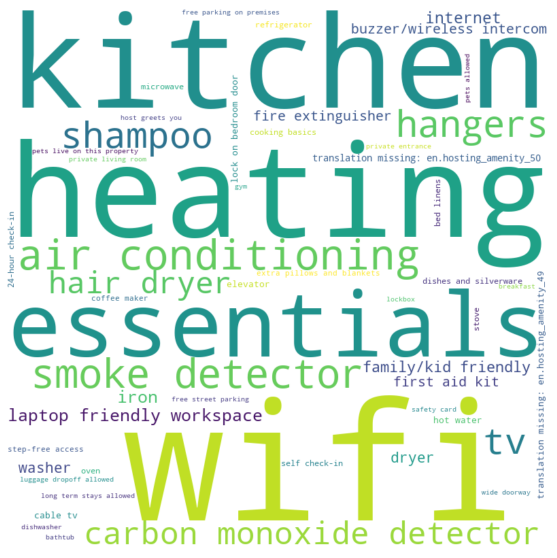

In [73]:
# Do analysis on the "amenities" column
text=''.join(str(i) for i in df["amenities"])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(Counter_dict)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()

## Graphs

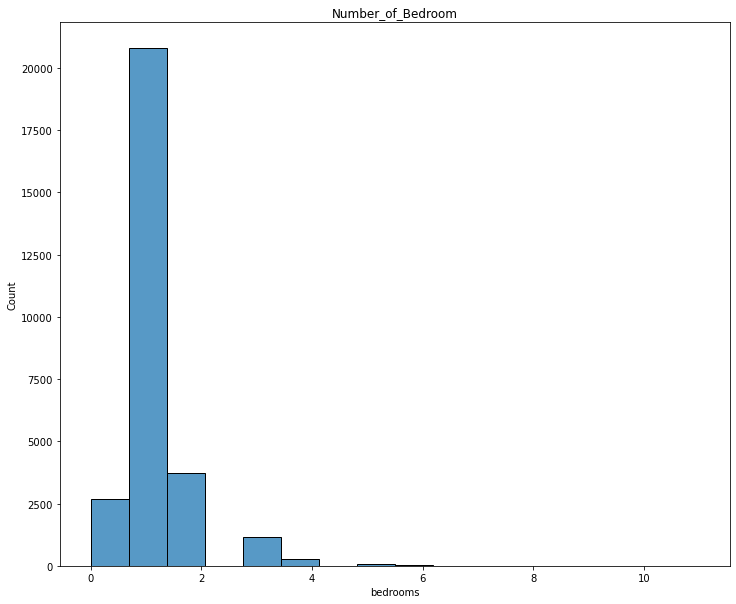

In [74]:
# Histogram for number of bedroom
sns.histplot(x = "bedrooms", data = df).set(title = "Number_of_Bedroom");

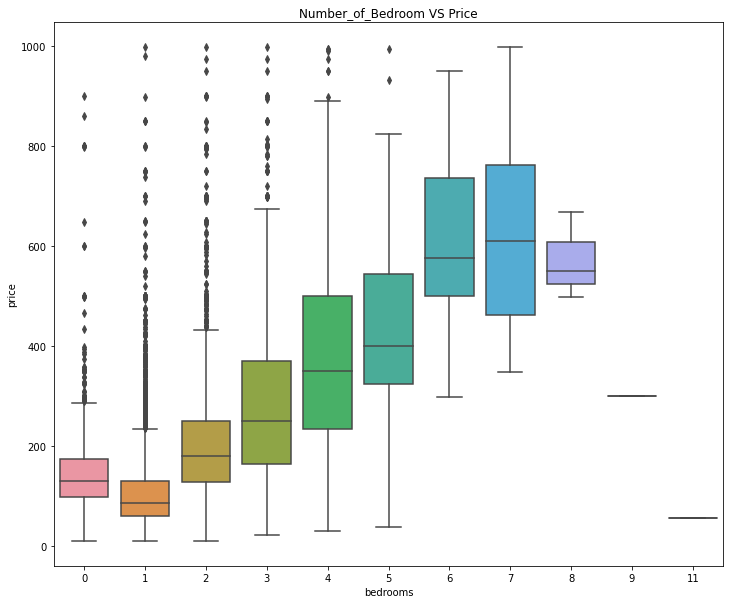

In [75]:
# Boxplot for number of bedroom VS price 
sns.boxplot(x = "bedrooms", y = "price", data = df).set(title = "Number_of_Bedroom VS Price");

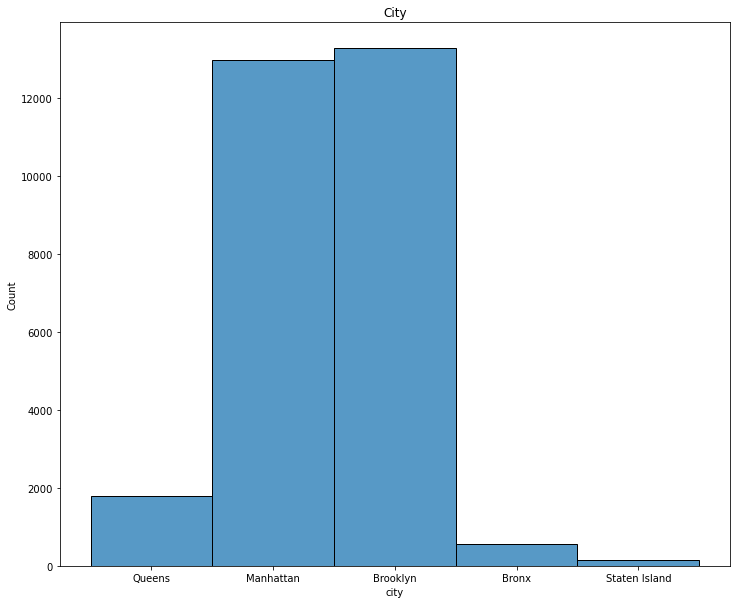

In [76]:
# histogram for number of houses in each city
counts = df['city'].value_counts()
sns.histplot(x='city', data=df[df["city"].isin(counts[counts > 30].index)]).set(title = "City");

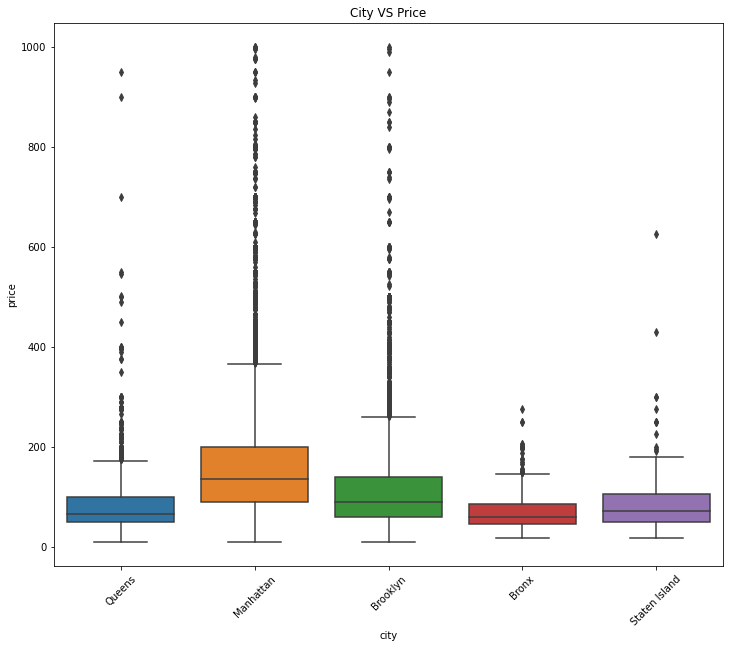

In [77]:
# Boxplot for city VS price
counts = df['city'].value_counts()
ax = sns.boxplot(x='city', y='price', data=df[df["city"].isin(counts[counts > 30].index)]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set(title = "City VS Price");

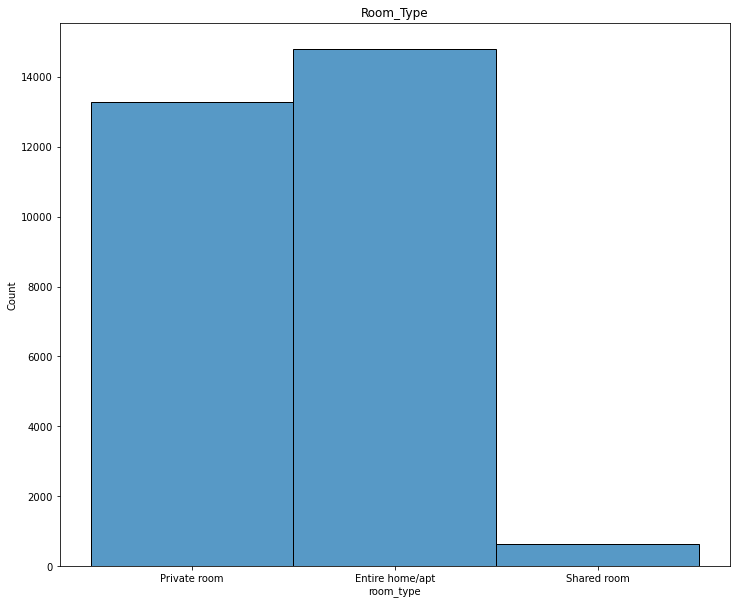

In [78]:
# Histogram for number of houses for each room type
sns.histplot(x = "room_type", data = df).set(title = "Room_Type");

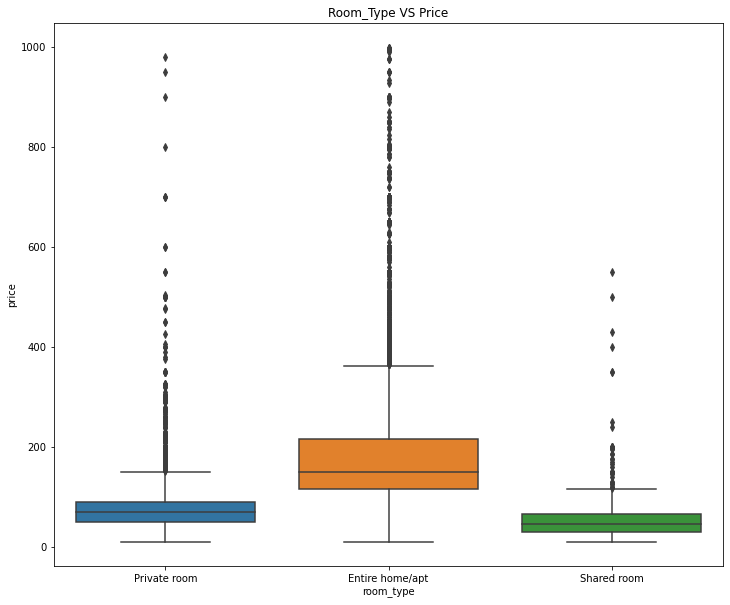

In [79]:
# Boxplot for room type VS price
sns.boxplot(x = "room_type", y = "price", data = df).set(title = "Room_Type VS Price");

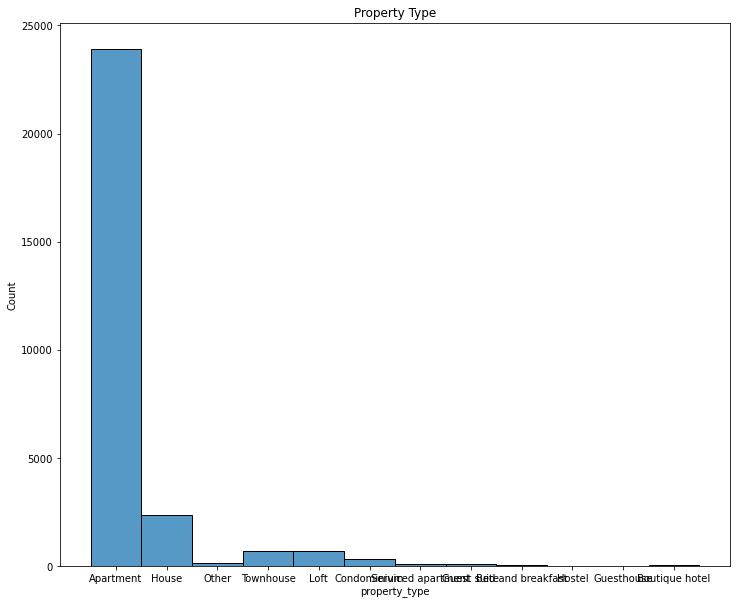

In [80]:
# Histogram for number of houses for each property type
counts = df['property_type'].value_counts()
sns.histplot(x='property_type', data=df[df["property_type"].isin(counts[counts > 30].index)]).set(title = "Property Type");

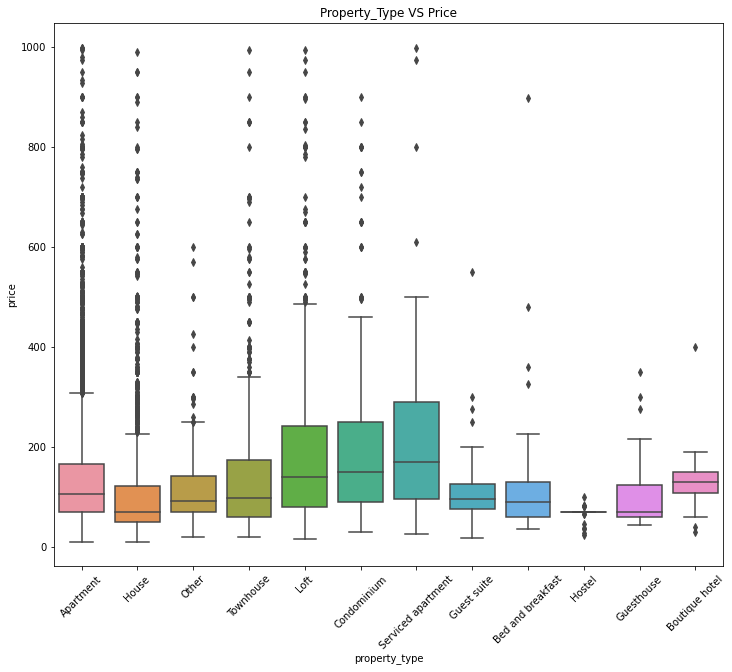

In [81]:
# Boxplot for property type VS price
counts = df['property_type'].value_counts()
ax = sns.boxplot(x='property_type', y='price', data=df[df["property_type"].isin(counts[counts > 30].index)])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set(title = "Property_Type VS Price");

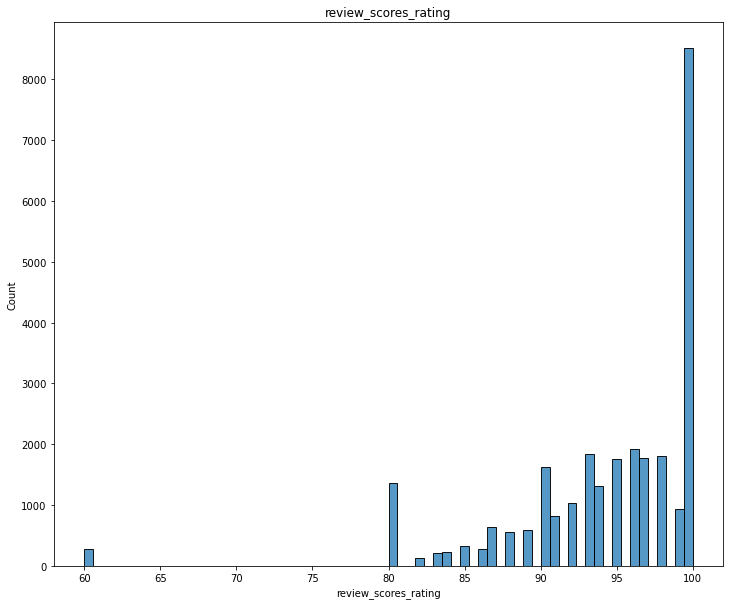

In [82]:
# Histogram for number of houses for each review scores rating
counts = df['review_scores_rating'].value_counts()
sns.histplot(x='review_scores_rating', data=df[df["review_scores_rating"].isin(counts[counts > 100].index)]).set(title = 'review_scores_rating');

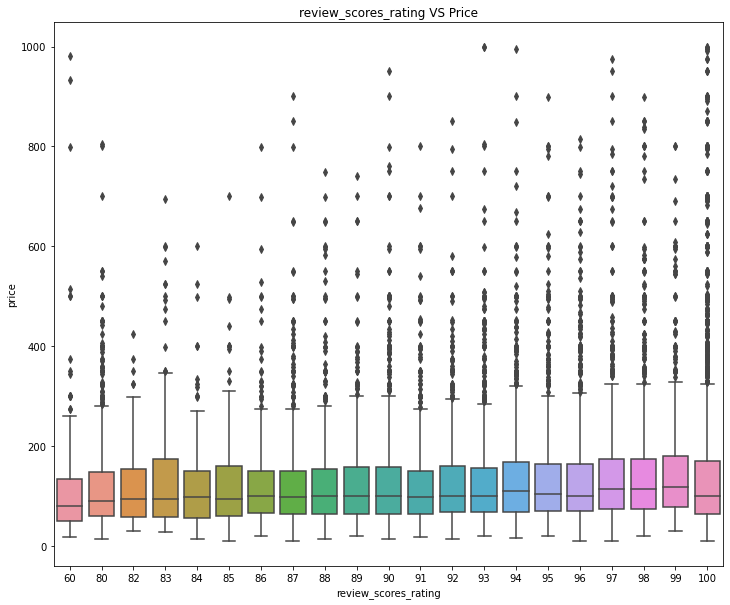

In [83]:
# Boxplot for review scores rating VS price
counts = df['review_scores_rating'].value_counts()
sns.boxplot(x = "review_scores_rating", y = "price", data=df[df["review_scores_rating"].isin(counts[counts > 100].index)]).set(title = "review_scores_rating VS Price");

In [84]:
# Filter out all the columns containing "review scores"
review_scores = df.filter(like='review_scores')
review_scores

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,90,9,8,10,10,10,10
1,93,10,9,10,10,8,9
2,100,10,10,10,10,10,10
3,89,9,10,9,9,9,9
4,87,10,9,10,10,10,10
...,...,...,...,...,...,...,...
28726,97,10,10,10,10,9,10
28727,87,8,7,9,9,9,9
28728,97,10,10,10,10,10,10
28729,100,10,10,10,10,10,10


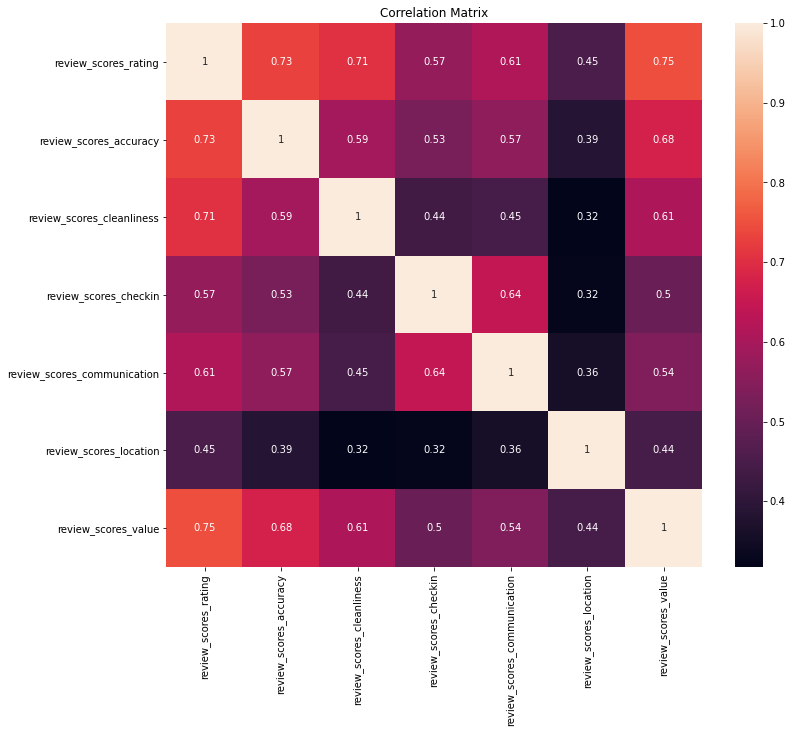

In [85]:
# Heatmap for review scores related columns and price column
corr = review_scores.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns).set(title = "Correlation Matrix");

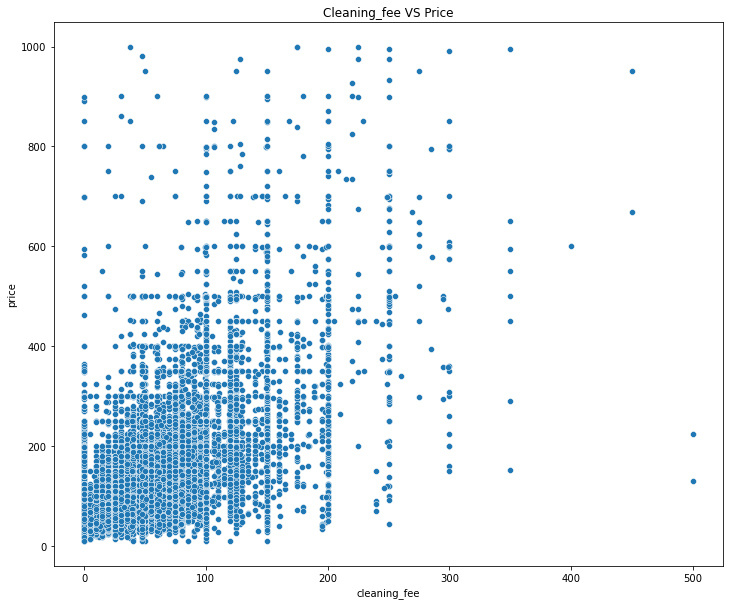

In [86]:
# Scatterplot showing the relationship between cleaning fee VS price
sns.scatterplot(x = "cleaning_fee", y = "price", data = df).set(title = "Cleaning_fee VS Price");

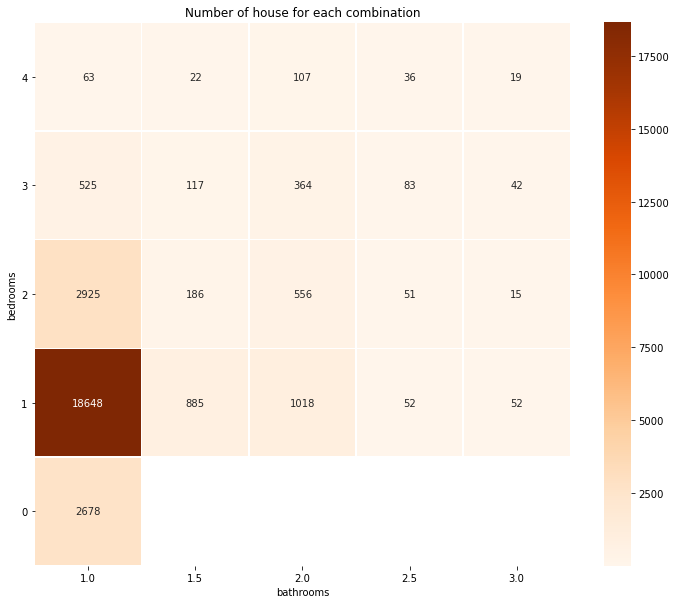

In [87]:
# Heatmap for number of house for each combination of number of bedroom and number of bathroom
counts_1 = df['bedrooms'].value_counts()
counts_2 = df['bathrooms'].value_counts()
data1 = df[(df["bedrooms"].isin(counts_1[counts_1 > 100].index)) & (df["bathrooms"].isin(counts_2[counts_2 > 100].index))]
g=sns.heatmap(data1\
                .groupby(['bedrooms', 'bathrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bedrooms', 'bathrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
g.set(title = "Number of house for each combination");
plt.show();

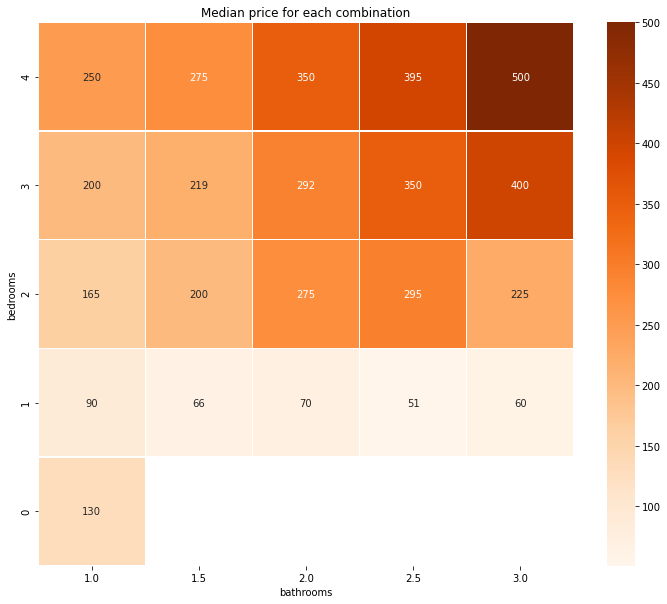

In [88]:
# Heatmap for median price of the house for each combination of number of bedroom and number of bathroom
g = sns.heatmap(data1\
                .groupby(['bedrooms', 'bathrooms'])\
                .median()['price']\
                .reset_index()\
                .pivot('bedrooms', 'bathrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
g.set(title = "Median price for each combination");
plt.show();

# Machine Learning

In [31]:
# This function just computes the mean squared error
def MSE(y, pred):
    return np.mean((y-pred)**2)

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

In [32]:
# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred

In [33]:
def run_OLSSum(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred, results

## a) Train / Test Split

The price column, 61 is our labels; the rest of the columns are our features. We now will generate a data matrix ($X$ from class), use column 61 as a target vector ($y$ from class), and create a train/test split;

We do the 80 / 20 train test split, and randomly grab $80\%$ as the train data, with $20\%$ held out for validation or test data.

In [34]:
# let's only consider the examples for which the price is known
df = df[~df['price'].isna()] 

n = len(df)
print('Size of dataset: ', str(n))

# Feature space and target column
target_space = df['price']
feature_spaces = df.loc[:, ~df.columns.isin(target_space)]

# Split the dataset into a training set and a test set
train_x, test_x, train_y, test_y = train_test_split(feature_spaces, target_space, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", train_x.shape)
print("Test set shape:", test_x.shape)
print("Training set y length:", train_y.shape[0])
print("Test set y length:", test_y.shape[0])

Size of dataset:  28729
Training set shape: (22983, 86)
Test set shape: (5746, 86)
Training set y length: 22983
Test set y length: 5746


## b) Real-Valued Data

Only includes Real-valued Data
  - host_listings_count
  - host_total_listings_count
  - accomodates
  - bathrooms
  - bedrooms
  - guests_included		
  - extra_people
  - minimum_nights
  - maximum_nights
  - availability_30
  - availability_60
  - availability_90
  - availability_365
  - number_of_reviews
  - review_scores_rating
  - review_scores_accuracy
  - review_scores_cleanliness
  - review_scores_checkin
  - review_scores_communication
  - review_scores_location
  - review_scores_value

The following data are stored as string:

  - beds
  - security_deposit
  - cleaning_fee
  
For missing value, any non-numerical value as a "0", which is an accurate interpretation of "N\A" in this context.

In [35]:
# "This function converts strings to floating point values 
# and strings that cannot be represented as a number (like NA) are converted to zeros"
def string_to_float(string):
    try:
        return float(string)
    except:
        return 0.0

labels_real = [
  'host_listings_count',
  'host_total_listings_count',
  'accommodates',
  'bathrooms',
  'bedrooms',
  'guests_included',
  'extra_people',
  'minimum_nights',
  'maximum_nights',
  'availability_30',
  'availability_60',
  'availability_90',
  'availability_365',
  'number_of_reviews',
  'review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value'
]


labels_string = [
    'beds',
    'security_deposit',
    'cleaning_fee'
]

In [36]:
train_vals_real = np.asarray(train_x.loc[:,labels_real])
test_vals_real = np.asarray(test_x.loc[:,labels_real])

# impute NaN values with 0.0 (float valued data)
train_vals_from_string = train_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
test_vals_from_string = test_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))

# cast them as np arrays
train_vals_from_string = np.asarray(train_vals_from_string)
test_vals_from_string = np.asarray(test_vals_from_string)

# Include offset term
offset1 = np.ones((len(train_vals_from_string), 1))
offset2 = np.ones((len(test_vals_from_string), 1))

train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1), axis=1)
test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2), axis=1)

In [37]:
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

In [38]:
label = labels_real+labels_string
label.append('constant')

In [39]:
len(label)

25

In [40]:
# OLS Regression results
result.summary(xname=label)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     1025.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:17:03   Log-Likelihood:            -1.3124e+05
No. Observations:               22983   AIC:                         2.625e+05
Df Residuals:                   22959   BIC:                         2.627e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
host_listings_count             0.0341      0.015      2.205      0.027       0.004       0.064
host_total_listings_count       0.0341      0.015      2.205      0.027       0.004       0.064
accommodates                   20.6867      0.528     39.174      0.000      19.652      21.722
bathrooms                      21.6764      1.299     16.692      0.000      19.131      24.222
bedrooms                        9.4622      0.984      9.621      0.000       7.534      11.390
guests_included                 1.0975      0.568      1.934      0.053      -0.015       2.210
extra_people                    0.0812      0.022      3.699      0.000       0.038       0.124
minimum_nights                 -0.2732      0.046     -5.923      0.000      -0.364      -0.183
maximum_nights               2.564e-08   3.41e-08      0.753      0.452   -4.11e-08    9.24e-08
availability_30                 0.7368      0.143      5.149      0.000       0.456       1.017
availability_60                 0.0705      0.150      0.469      0.639      -0.224       0.365
availability_90                -0.2588      0.077     -3.342      0.001      -0.411      -0.107
availability_365                0.0046      0.005      0.871      0.384      -0.006       0.015
number_of_reviews              -0.0722      0.013     -5.447      0.000      -0.098      -0.046
review_scores_rating            0.9078      0.113      8.044      0.000       0.687       1.129
review_scores_accuracy          0.9020      0.932      0.968      0.333      -0.925       2.729
review_scores_cleanliness       1.9368      0.653      2.967      0.003       0.657       3.216
review_scores_checkin          -5.4732      0.949     -5.768      0.000      -7.333      -3.613
review_scores_communication     0.9915      1.022      0.970      0.332      -1.012       2.995
review_scores_location         19.8501      0.692     28.677      0.000      18.493      21.207
review_scores_value           -13.7446      0.891    -15.427      0.000     -15.491     -11.998
beds                           -5.1493      0.875     -5.886      0.000      -6.864      -3.434
security_deposit                0.0438      0.004     11.947      0.000       0.037       0.051
cleaning_fee                    0.8744      0.015     58.627      0.000       0.845       0.904
constant                     -139.6400      8.489    -16.450      0.000    -156.278    -123.002
==============================================================================
Omnibus:                    13193.354   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257699.892
Skew:                           2.368   Prob(JB):                         0.00
Kurtosis:                      18.706   Cond. No.                     4.91e+19


Train MSE	 5339.882364660622
Test MSE	 5143.786921225934


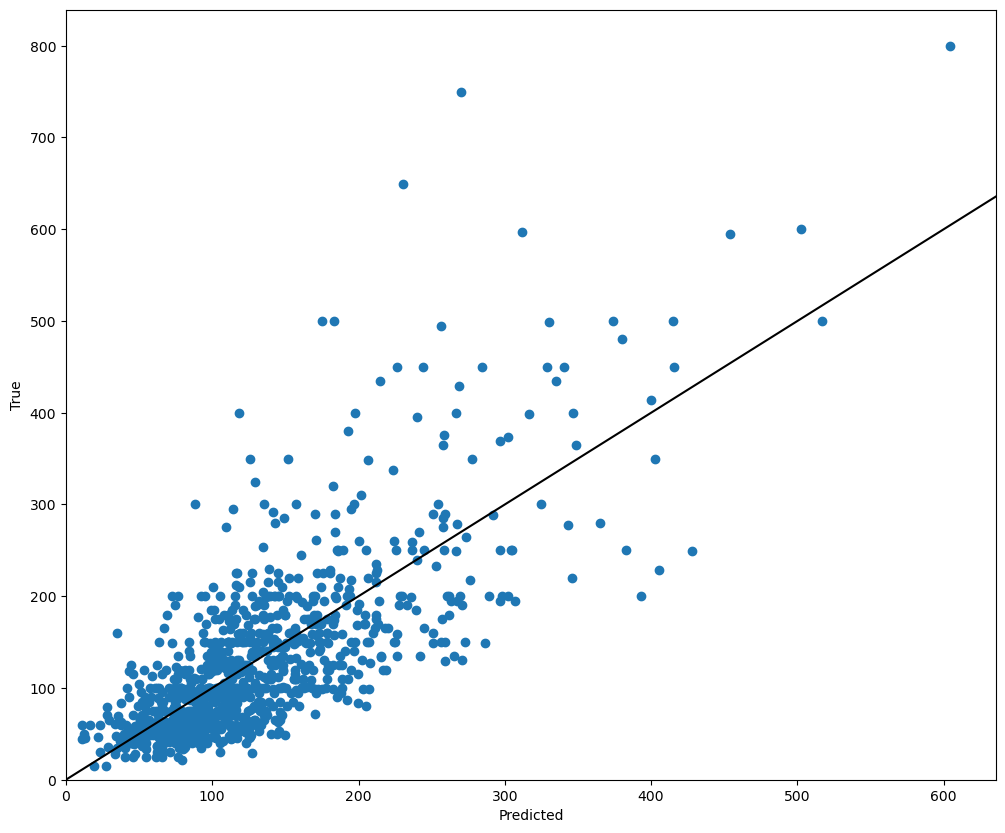

In [41]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

In [42]:
columns_keep = result.pvalues <= 0.05
train_vals = train_vals[:, result.pvalues <= 0.05]
test_vals = test_vals[:, result.pvalues <= 0.05]
label = np.asarray(label)[result.pvalues <= 0.05]
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

In [43]:
label

array(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'extra_people', 'minimum_nights',
       'availability_30', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_value', 'beds', 'security_deposit', 'cleaning_fee',
       'constant'], dtype='<U27')

In [44]:
len(label)

19

Train MSE	 5341.604017644439
Test MSE	 5141.616937879551


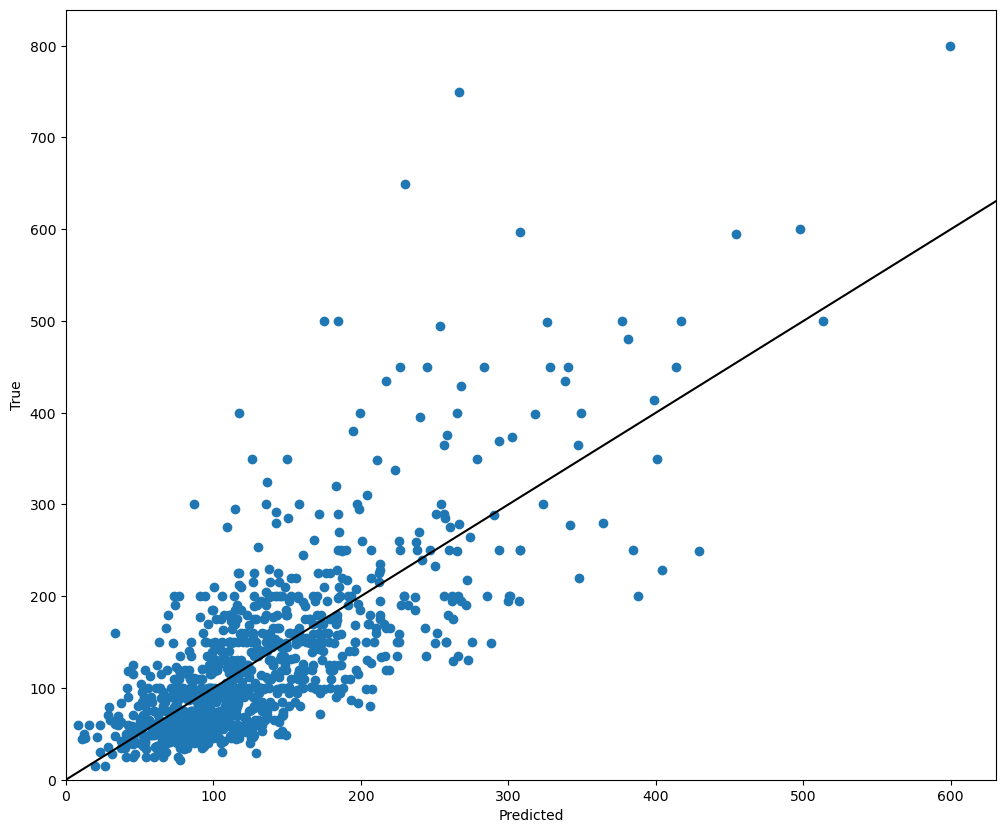

In [45]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

## c) Boolean Data

There are also many boolean parameters, which might inform the price:

  - require_guest_profile_picture
  - require_guest_phone_verification
  - instant_bookable
  - is_business_travel_ready
  - has_availability
  - is_location_exact
  - host_identity_verified
  - host_has_profile_pic
  - host_is_superhost

In [46]:
# Converts from "t" and "f" into true and false
def string_to_bool(string):
    return string == 't'

bool_labels = [
  'require_guest_profile_picture',
  'require_guest_phone_verification',
  'instant_bookable',
  'is_business_travel_ready',
  'has_availability',
  'is_location_exact',
  'host_identity_verified',
  'host_has_profile_pic',
  'host_is_superhost'
]

label = np.append(label, bool_labels)

In [47]:
train_bv = train_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
test_bv = test_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))

train_bv = np.asarray(train_bv)
test_bv = np.asarray(test_bv)

train_vals = np.concatenate((train_vals, train_bv), axis = 1)
test_vals = np.concatenate((test_vals, test_bv), axis = 1)

In [48]:
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

In [49]:
result.summary(xname=label.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     951.1
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:17:09   Log-Likelihood:            -1.3119e+05
No. Observations:               22983   AIC:                         2.624e+05
Df Residuals:                   22957   BIC:                         2.626e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
host_listings_count                  0.0340      0.015      2.203      0.028       0.004       0.064
host_total_listings_count            0.0340      0.015      2.203      0.028       0.004       0.064
accommodates                        20.7870      0.510     40.731      0.000      19.787      21.787
bathrooms                           22.0638      1.296     17.022      0.000      19.523      24.604
bedrooms                             9.7376      0.980      9.941      0.000       7.818      11.658
extra_people                         0.0919      0.021      4.404      0.000       0.051       0.133
minimum_nights                      -0.2799      0.046     -6.081      0.000      -0.370      -0.190
availability_30                      0.7359      0.101      7.282      0.000       0.538       0.934
availability_90                     -0.1936      0.033     -5.853      0.000      -0.258      -0.129
number_of_reviews                   -0.0753      0.014     -5.506      0.000      -0.102      -0.048
review_scores_rating                 0.9106      0.106      8.617      0.000       0.703       1.118
review_scores_cleanliness            2.1146      0.649      3.258      0.001       0.842       3.387
review_scores_checkin               -5.1474      0.847     -6.081      0.000      -6.807      -3.488
review_scores_location              19.9493      0.689     28.954      0.000      18.599      21.300
review_scores_value                -13.2847      0.863    -15.391      0.000     -14.977     -11.593
beds                                -4.9616      0.870     -5.703      0.000      -6.667      -3.256
security_deposit                     0.0401      0.004     10.874      0.000       0.033       0.047
cleaning_fee                         0.8612      0.015     57.692      0.000       0.832       0.890
constant                           -56.2980      6.235     -9.030      0.000     -68.519     -44.077
require_guest_profile_picture       -4.8978      4.676     -1.047      0.295     -14.064       4.268
require_guest_phone_verification     4.6736      4.473      1.045      0.296      -4.095      13.442
instant_bookable                    -6.2350      1.065     -5.852      0.000      -8.323      -4.147
is_business_travel_ready            13.2486      2.066      6.414      0.000       9.200      17.298
has_availability                   -56.2980      6.235     -9.030      0.000     -68.519     -44.077
is_location_exact                    0.4729      1.340      0.353      0.724      -2.153       3.099
host_identity_verified               3.9269      1.034      3.797      0.000       1.900       5.954
host_has_profile_pic               -18.6171      9.710     -1.917      0.055     -37.649       0.415
host_is_superhost                   -3.3118      1.38

Train MSE	 5317.191490373757
Test MSE	 5123.186411106303


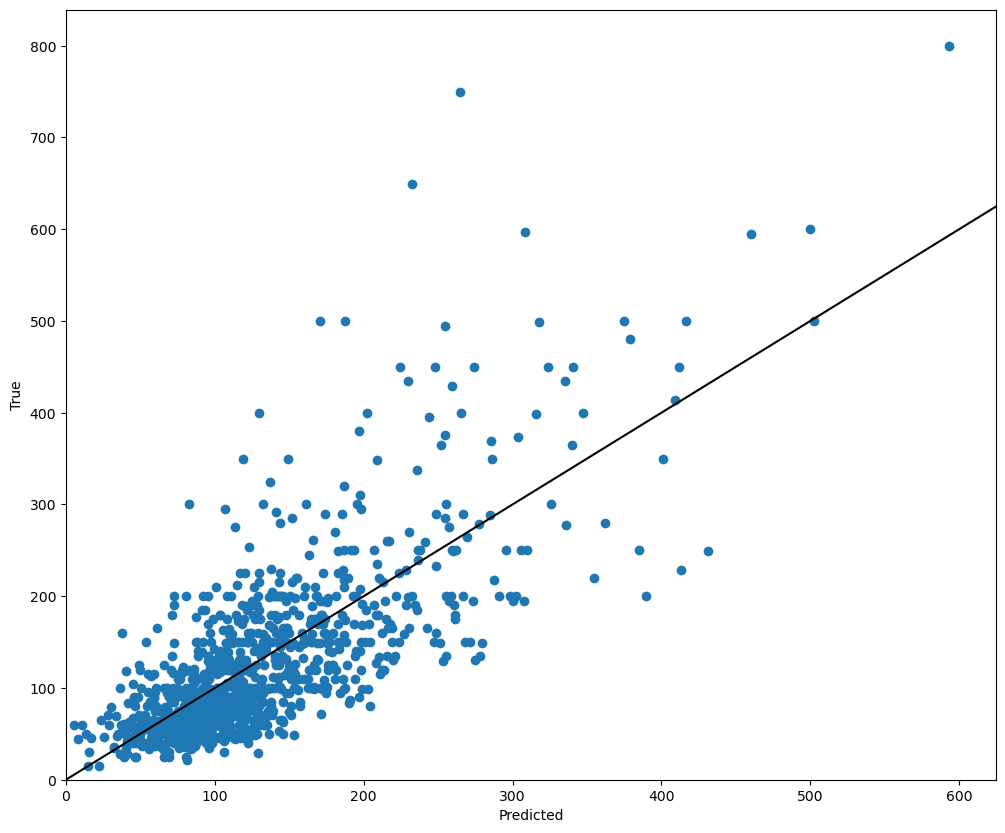

In [50]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

In [51]:
columns_keep = columns_keep + (result.pvalues <= 0.05)
train_vals = train_vals[:, result.pvalues <= 0.05]
test_vals = test_vals[:, result.pvalues <= 0.05]
label = np.asarray(label)[result.pvalues <= 0.05]
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

Train MSE	 5318.353242398172
Test MSE	 5124.026507516337


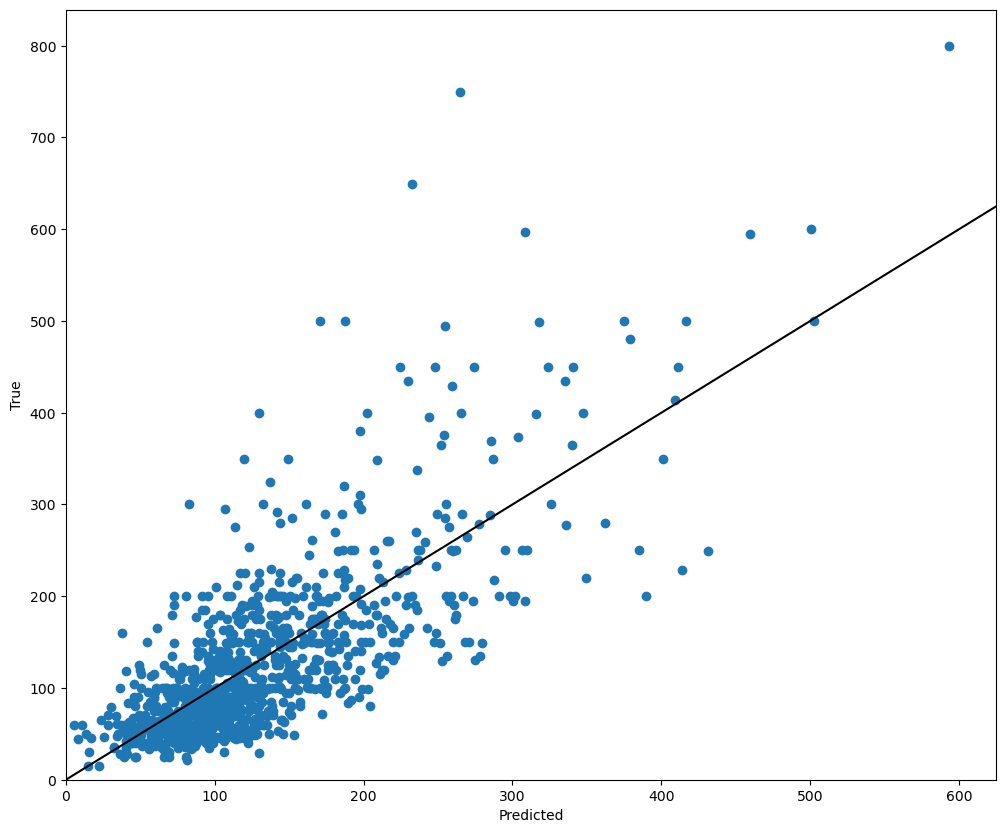

In [52]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

## d) Categorical Data

Transform the data into one-hot vectors. 

In [53]:
cat_labels = [
  'property_type',
  'room_type',
  'bed_type',
  'cancellation_policy',
  'host_response_time'
]

#Sets of all categories in a particular column
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [54]:
label = np.append(label, cats_sets)

In [55]:
# DataFrame method
def onehot(column=None, col=None):
    
    onehotarray = np.asarray(column.fillna('NaN').apply(lambda x: 1 if x == col[0] else 0)).reshape((-1, 1))
    for i in range(1,len(col)):
        a = np.asarray(column.fillna('NaN').apply(lambda x: 1 if x == col[i] else 0)).reshape((-1, 1))
        onehotarray = np.concatenate((onehotarray, a), axis = 1)

    
    return onehotarray

In [56]:
train_cat_vals = onehot(train_x[cat_labels[0]], cats_sets[0])
test_cat_vals = onehot(test_x[cat_labels[0]], cats_sets[0])

for i in range(1, len(cat_labels)):
    train_cat_vals = np.concatenate((train_cat_vals, onehot(train_x[cat_labels[i]], cats_sets[i])), axis = 1)
    test_cat_vals = np.concatenate((test_cat_vals, onehot(test_x[cat_labels[i]], cats_sets[i])), axis = 1)

train_vals = np.concatenate((train_vals, train_cat_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_cat_vals), axis = 1)

In [57]:
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     460.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:17:12   Log-Likelihood:            -1.3006e+05
No. Observations:               22983   AIC:                         2.602e+05
Df Residuals:                   22920   BIC:                         2.608e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0319      0.015      2.111      0.035       0.002       0.061
x2             0.0319      0.015      2.111      0.035       0.002       0.061
x3            12.7766      0.520     24.558      0.000      11.757      13.796
x4            32.2315      1.269     25.389      0.000      29.743      34.720
x5            19.8368      0.961     20.632      0.000      17.952      21.721
x6             0.1082      0.020      5.404      0.000       0.069       0.148
x7            -0.3306      0.044     -7.498      0.000      -0.417      -0.244
x8             0.6706      0.097      6.944      0.000       0.481       0.860
x9             0.0088      0.032      0.272      0.785      -0.055       0.072
x10           -0.0374      0.013     -2.821      0.005      -0.063      -0.011
x11            0.7468      0.101      7.386      0.000       0.549       0.945
x12            1.6661      0.622      2.679      0.007       0.447       2.885
x13           -4.6993      0.809     -5.809      0.000      -6.285      -3.114
x14           17.7784      0.661     26.895      0.000      16.483      19.074
x15          -11.6190      0.825    -14.078      0.000     -13.237     -10.001
x16           -3.5906      0.835     -4.301      0.000      -5.227      -1.954
x17            0.0288      0.004      8.127      0.000       0.022       0.036
x18            0.6463      0.015     42.908      0.000       0.617       0.676
const        -30.0506      5.103     -5.889      0.000     -40.052     -20.049
x19           -1.7204      1.086     -1.584      0.113      -3.849       0.409
x20            1.6673      1.998      0.834      0.404      -2.250       5.584
x21          -30.0506      5.103     -5.889      0.000     -40.052     -20.049
x22            3.2727      0.988      3.312      0.001       1.336       5.209
x23            2.5358      1.345      1.886      0.059      -0.100       5.172
x24          -17.3523      6.686     -2.595      0.009     -30.458      -4.246
x25          -36.0261      6.850     -5.259      0.000     -49.453     -22.599
x26           19.6036      7.867      2.492      0.013       4.184      35.023
x27            7.5313      7.253      1.038      0.299      -6.684      21.747
x28           99.4541     22.333      4.453      0.000      55.681     143.228
x29          -33.6794      7.253     -4.643      0.000     -47.896     -19.462
x30           33.3804     24.630      1.355      0.175     -14.897      81.657
x31           13.4167     10.118      1.326      0.185      -6.416      33.249
x32          -14.0220      8.707     -1.610      0.107     -31.089       3.045
x33          -39.8087     10.184     -3.909      0.000     -59.769     -19.848
x34            4.2320     10.996      0.385      0.700     -17.320      25.784
x35          -10.6543     26.210     -0.407      0.684     -62.027      40.718
x3

Train MSE	 4817.951831317572
Test MSE	 4610.405267376934


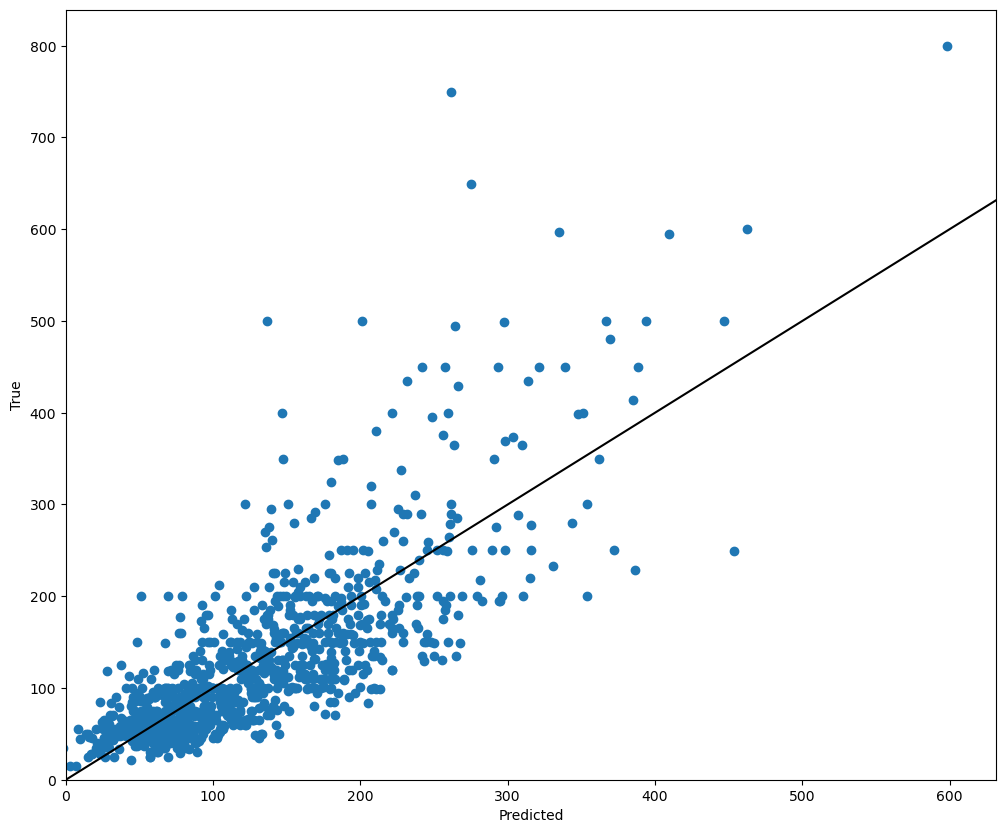

In [59]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

## e) Set data

host_verifications column - set data, encoded with a many-hot vector.

In [60]:
unparsed_str = train_x.loc[:, 'host_verifications'][0]
print(unparsed_str)
print(type(unparsed_str))

['email', 'phone', 'facebook', 'google', 'reviews']
<class 'str'>


In [61]:
parsed_str = train_x.loc[:, 'host_verifications'][0].strip('[]').replace('\'','').split(', ')
print(parsed_str)
print(type(parsed_str))
print([type(i) for i in parsed_str])

['email', 'phone', 'facebook', 'google', 'reviews']
<class 'list'>
[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


helper function will parse the strings found in the host_verifications column into appropriate string arrays.

In [62]:
def parse_str(string):
    parsed_str = string.strip('[]').replace('\'','').split(', ')
    return [i for i in parsed_str]

In [63]:
train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))

print(train_set_vals[0])
print(type(train_set_vals[0]))

['email', 'phone', 'facebook', 'google', 'reviews']
<class 'list'>


In [64]:
train_set_vals

6755                [email, phone, facebook, reviews, kba]
25475                              [email, phone, reviews]
13316                       [email, phone, reviews, jumio]
21240               [email, phone, linkedin, reviews, kba]
10135    [email, phone, reviews, jumio, offline_governm...
                               ...                        
21577                              [email, phone, reviews]
5391                [email, phone, facebook, reviews, kba]
860                                       [phone, reviews]
15797    [email, phone, reviews, jumio, offline_governm...
23656        [email, phone, reviews, jumio, government_id]
Name: host_verifications, Length: 22983, dtype: object

In [65]:
def ifvalueq(alist, value):
    for i in range(len(alist)):
        if alist[i] == value:
            return True
    return False

def manyhot(column=None, col=None):
    
    manyhotarray = np.asarray(column.apply(lambda x: 1 if ifvalueq(x, col[0]) else 0)).reshape((-1, 1))
    
    for i in range(1,len(col)):
        a = np.asarray(column.apply(lambda x: 1 if ifvalueq(x, col[i]) else 0)).reshape((-1, 1))
        manyhotarray = np.concatenate((manyhotarray, a), axis = 1)

    
    return manyhotarray

In [66]:
train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))

vtypes = train_set_vals.explode().unique()

train_set_vals = manyhot(train_set_vals, vtypes)
test_set_vals = manyhot(test_set_vals, vtypes)

train_vals = np.concatenate((train_vals, train_set_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_set_vals), axis = 1)

In [67]:
train_set_vals

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

Train MSE	 4809.519695250607
Test MSE	 4606.999095619379


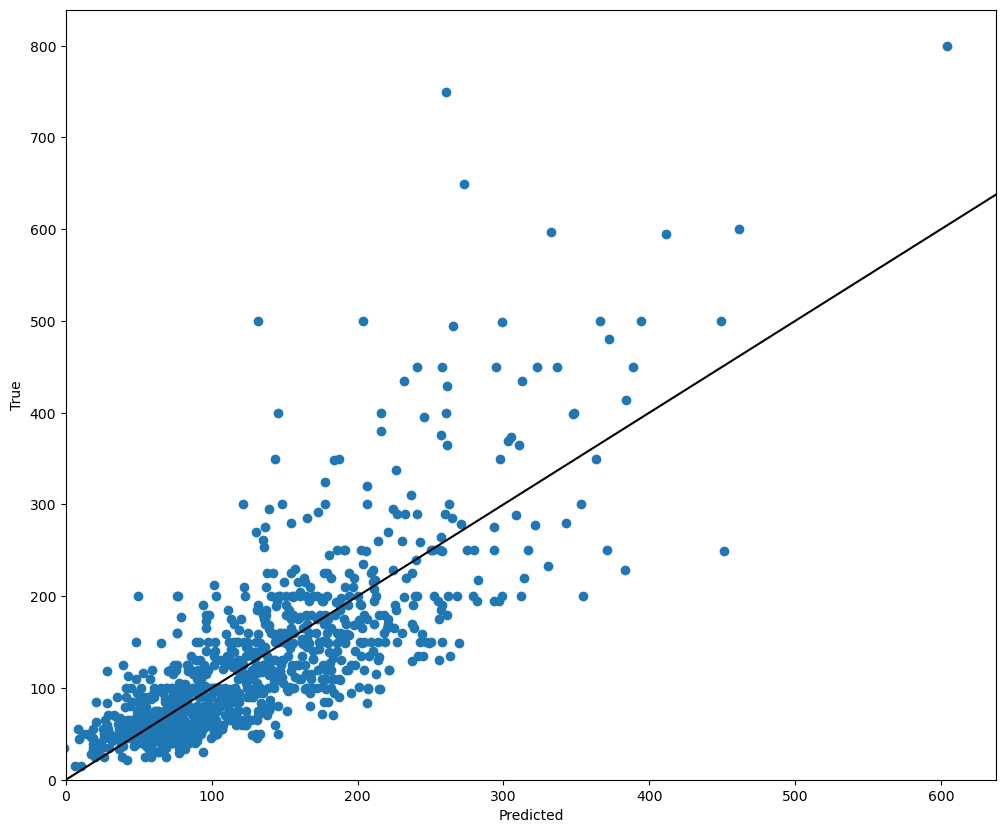

In [68]:
train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_vals, test_vals)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

## f) Location -> One-hot encoding

Use one of the most granular descriptions available - zipcode

In [69]:
l = ['zipcode']

cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]
print("Number of categories\t", len(cats_sets[0]))

Number of categories	 178


In [70]:
l = ['zipcode']

cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]

train_zip = onehot(train_x[l[0]], cats_sets[0])
test_zip = onehot(test_x[l[0]], cats_sets[0])

train_vals = np.concatenate((train_vals, train_zip), axis = 1)
test_vals = np.concatenate((test_vals, test_zip), axis = 1)


Train MSE	 3878.0496094693362
Test MSE	 3790.1629425253964


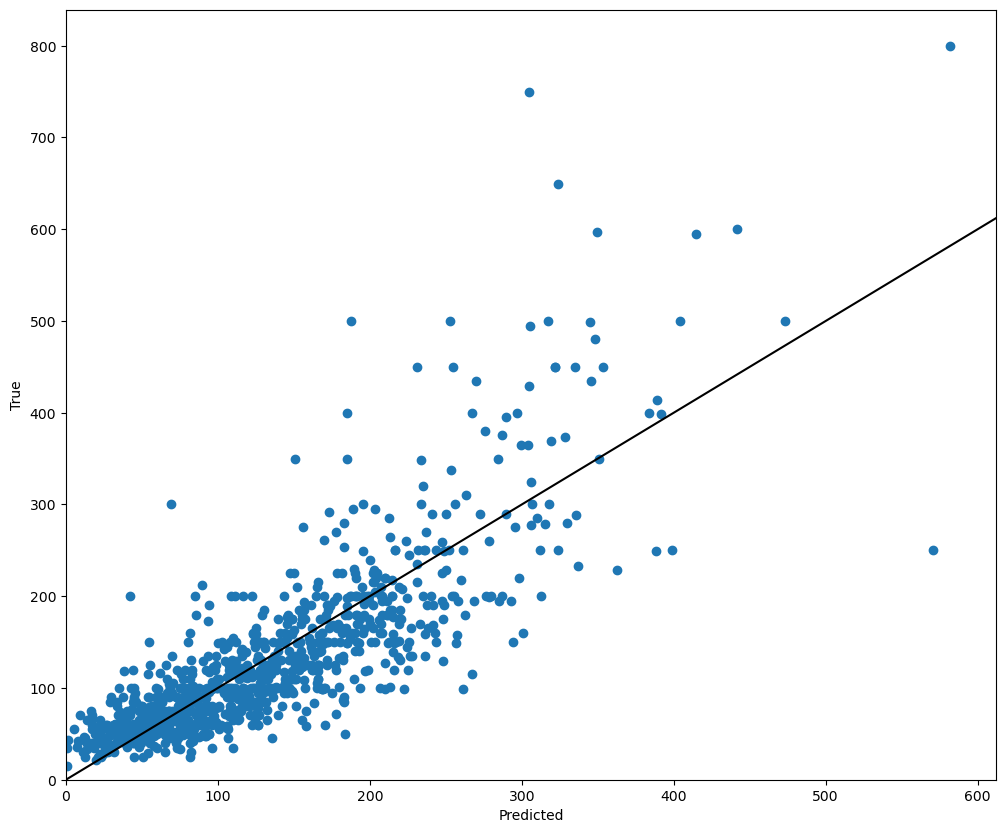

In [71]:
train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_vals, test_vals)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

## Run 500 Times to get MSE for train and test data set

In [72]:
train_MSE_all = []
test_MSE_all = []

# Offset term
offset1 = np.ones((len(train_vals_from_string), 1))
offset2 = np.ones((len(test_vals_from_string), 1))
for i in range(500):
    # Train Test Split
    # Feature space and target column
    target_space = df['price']
    feature_spaces = df.loc[:, ~df.columns.isin(target_space)]
    # Split the dataset into a training set and a test set
    train_x, test_x, train_y, test_y = train_test_split(feature_spaces, target_space, test_size=0.2)
    
    # Real-valued columns
    train_vals_real = np.asarray(train_x.loc[:,labels_real])
    test_vals_real = np.asarray(test_x.loc[:,labels_real])
    # impute NaN values with 0.0 (float valued data)
    train_vals_from_string = train_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
    test_vals_from_string = test_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
    # cast them as np arrays
    train_vals_from_string = np.asarray(train_vals_from_string)
    test_vals_from_string = np.asarray(test_vals_from_string)

    
    # Boolean Data
    train_bv = train_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
    test_bv = test_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
    train_bv = np.asarray(train_bv)
    test_bv = np.asarray(test_bv)

    
    # Categorical Data -> One-hot encoding
    cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]
    train_cat_vals = onehot(train_x[cat_labels[0]], cats_sets[0])
    test_cat_vals = onehot(test_x[cat_labels[0]], cats_sets[0])
    for i in range(1, len(cat_labels)):
        train_cat_vals = np.concatenate((train_cat_vals, onehot(train_x[cat_labels[i]], cats_sets[i])), axis = 1)
        test_cat_vals = np.concatenate((test_cat_vals, onehot(test_x[cat_labels[i]], cats_sets[i])), axis = 1)
    
    
    # Set Data -> Many-hot encoding
    train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
    test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
    vtypes = train_set_vals.explode().unique()
    train_set_vals = manyhot(train_set_vals, vtypes)
    test_set_vals = manyhot(test_set_vals, vtypes)
    

    # Location
    l = ['zipcode']
    cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]
    train_zip = onehot(train_x[l[0]], cats_sets[0])
    test_zip = onehot(test_x[l[0]], cats_sets[0])
    
    
    train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1, train_bv, train_cat_vals, train_set_vals, train_zip), axis = 1)
    test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2, test_bv, test_cat_vals, test_set_vals, test_zip), axis = 1)

    
    train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_vals, test_vals)
    train_MSE_all.append(train_MSE)
    test_MSE_all.append(test_MSE)

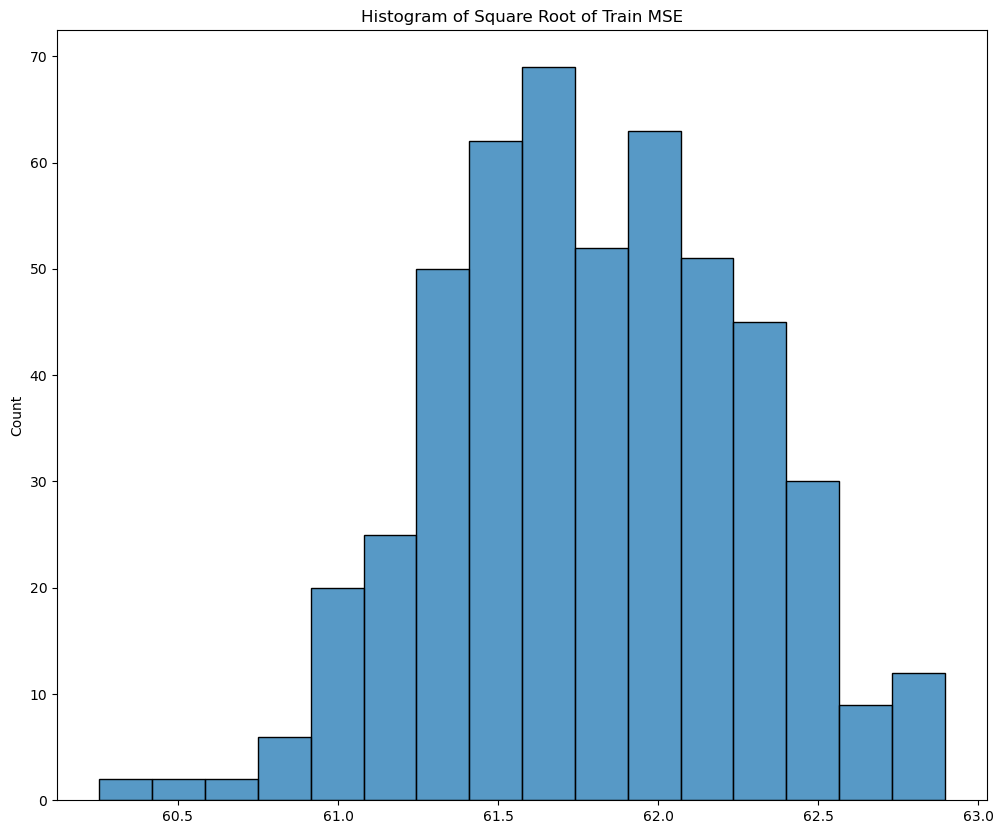

In [73]:
sns.histplot(x = np.sqrt(train_MSE_all)).set(title = "Histogram of Square Root of Train MSE");

In [74]:
test_MSE_alll = []
for i in range(len(test_MSE_all)):
    if test_MSE_all[i] < 7000:
        test_MSE_alll.append(test_MSE_all[i])

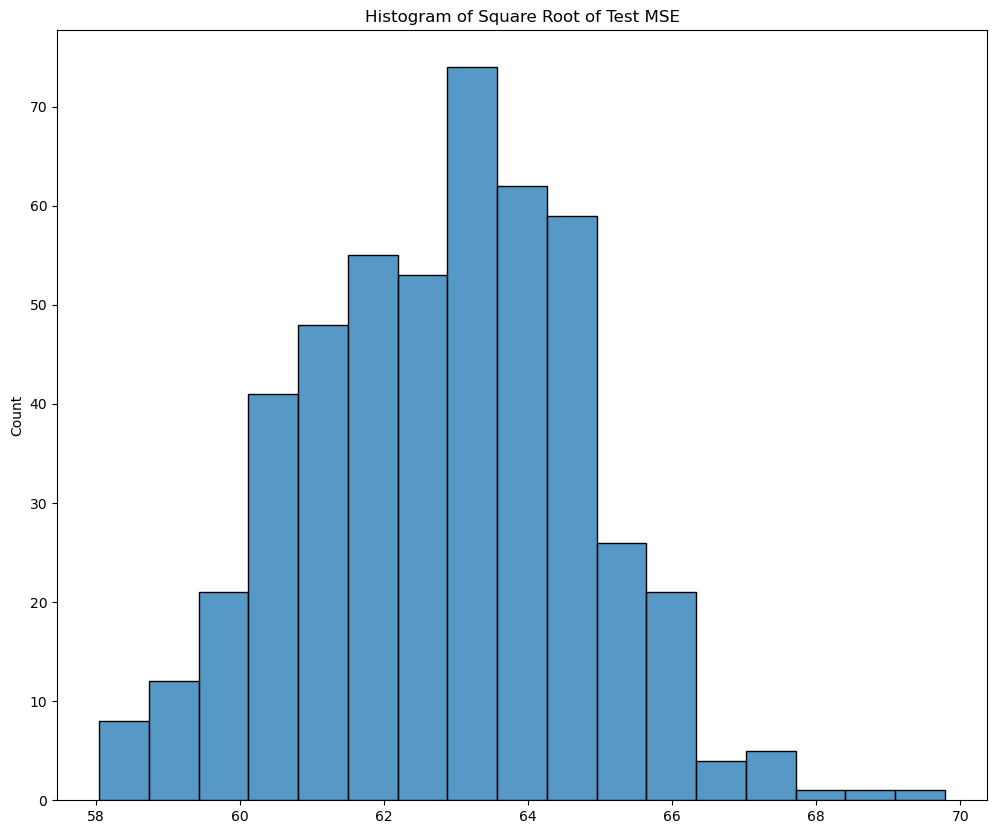

In [75]:
sns.histplot(x = np.sqrt(test_MSE_alll)).set(title = "Histogram of Square Root of Test MSE");

# Log(y) fit into linear regression

In [76]:
# let's only consider the examples for which the price is known
df = df[~df['price'].isna()] 

n = len(df)
print('Size of dataset: ', str(n))

# Feature space and target column
target_space = df['price']
feature_spaces = df.loc[:, ~df.columns.isin(target_space)]

# Split the dataset into a training set and a test set
train_x, test_x, train_y, test_y = train_test_split(feature_spaces, target_space, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", train_x.shape)
print("Test set shape:", test_x.shape)
print("Training set y length:", train_y.shape[0])
print("Test set y length:", test_y.shape[0])

train_y = np.log(train_y)
test_y = np.log(test_y)

Size of dataset:  28729
Training set shape: (22983, 86)
Test set shape: (5746, 86)
Training set y length: 22983
Test set y length: 5746


In [77]:
train_vals_real = np.asarray(train_x.loc[:,labels_real])
test_vals_real = np.asarray(test_x.loc[:,labels_real])

# impute NaN values with 0.0 (float valued data)
train_vals_from_string = train_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
test_vals_from_string = test_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))

# cast them as np arrays
train_vals_from_string = np.asarray(train_vals_from_string)
test_vals_from_string = np.asarray(test_vals_from_string)

# Include offset term
offset1 = np.ones((len(train_vals_from_string), 1))
offset2 = np.ones((len(test_vals_from_string), 1))

train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1), axis=1)
test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2), axis=1)

In [78]:
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

Train MSE	 0.20601206421607424
Test MSE	 0.20943796731164357


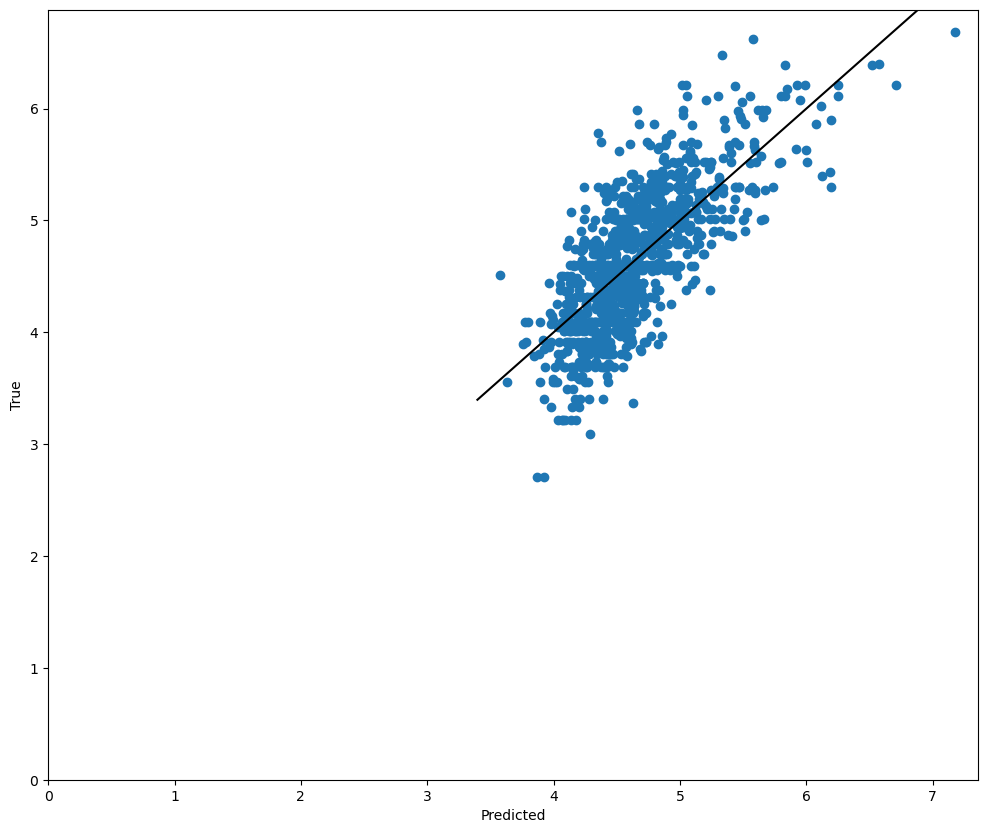

In [79]:
label = labels_real+labels_string
label.append('constant')
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

In [80]:
columns_keep = result.pvalues <= 0.05
train_vals = train_vals[:, result.pvalues <= 0.05]
test_vals = test_vals[:, result.pvalues <= 0.05]
label = np.asarray(label)[result.pvalues <= 0.05]
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)

Train MSE	 0.20607440172888572
Test MSE	 0.20946021550573635


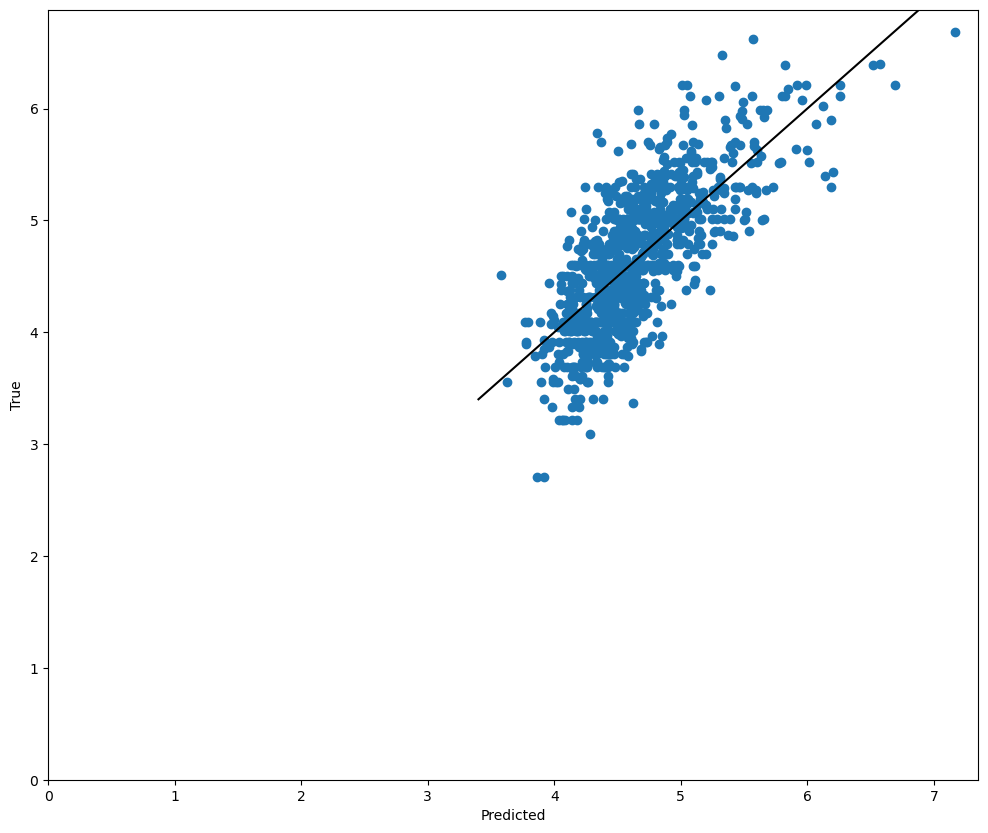

In [81]:
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

In [82]:
train_bv = train_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
test_bv = test_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))

train_bv = np.asarray(train_bv)
test_bv = np.asarray(test_bv)

train_vals = np.concatenate((train_vals, train_bv), axis = 1)
test_vals = np.concatenate((test_vals, test_bv), axis = 1)

Train MSE	 0.20400466142307228
Test MSE	 0.2068027773761269


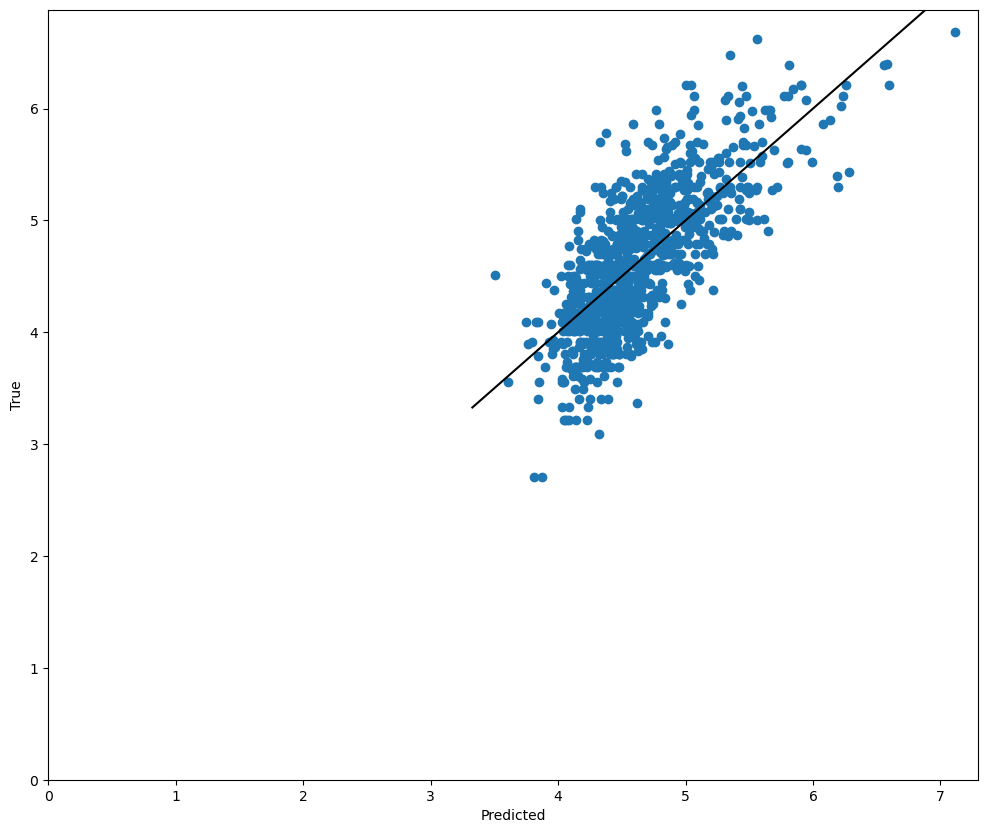

In [83]:
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

Train MSE	 0.2040955045256445
Test MSE	 0.206852531852714


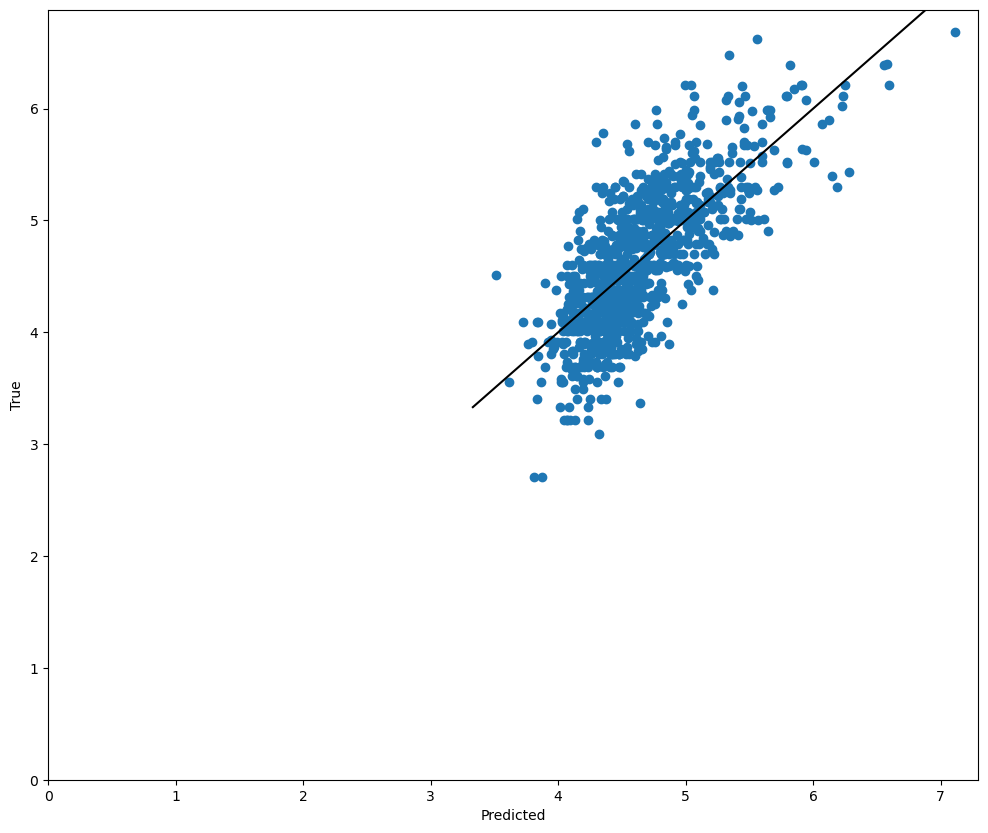

In [84]:
train_vals = train_vals[:, result.pvalues <= 0.05]
test_vals = test_vals[:, result.pvalues <= 0.05]
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

In [85]:
cat_labels = [
  'property_type',
  'room_type',
  'bed_type',
  'cancellation_policy',
  'host_response_time'
]

#Sets of all categories in a particular column
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [86]:
train_cat_vals = onehot(train_x[cat_labels[0]], cats_sets[0])
test_cat_vals = onehot(test_x[cat_labels[0]], cats_sets[0])

for i in range(1, len(cat_labels)):
    train_cat_vals = np.concatenate((train_cat_vals, onehot(train_x[cat_labels[i]], cats_sets[i])), axis = 1)
    test_cat_vals = np.concatenate((test_cat_vals, onehot(test_x[cat_labels[i]], cats_sets[i])), axis = 1)

train_vals = np.concatenate((train_vals, train_cat_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_cat_vals), axis = 1)

Train MSE	 0.152646471361675
Test MSE	 0.1543860207524816


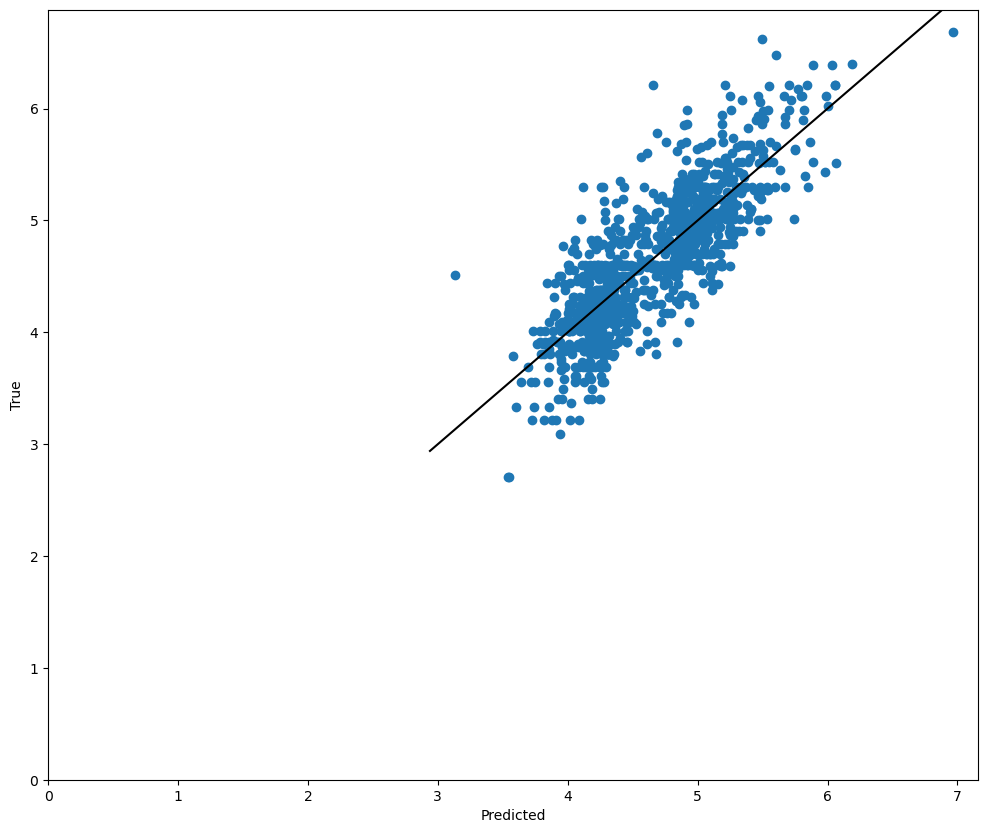

In [88]:
train_MSE, test_MSE, test_pred, result = run_OLSSum(train_y, test_y, train_vals, test_vals)
print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

In [89]:
train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))

vtypes = train_set_vals.explode().unique()

train_set_vals = manyhot(train_set_vals, vtypes)
test_set_vals = manyhot(test_set_vals, vtypes)

train_vals = np.concatenate((train_vals, train_set_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_set_vals), axis = 1)

Train MSE	 0.15209859247971422
Test MSE	 0.1541676126317805


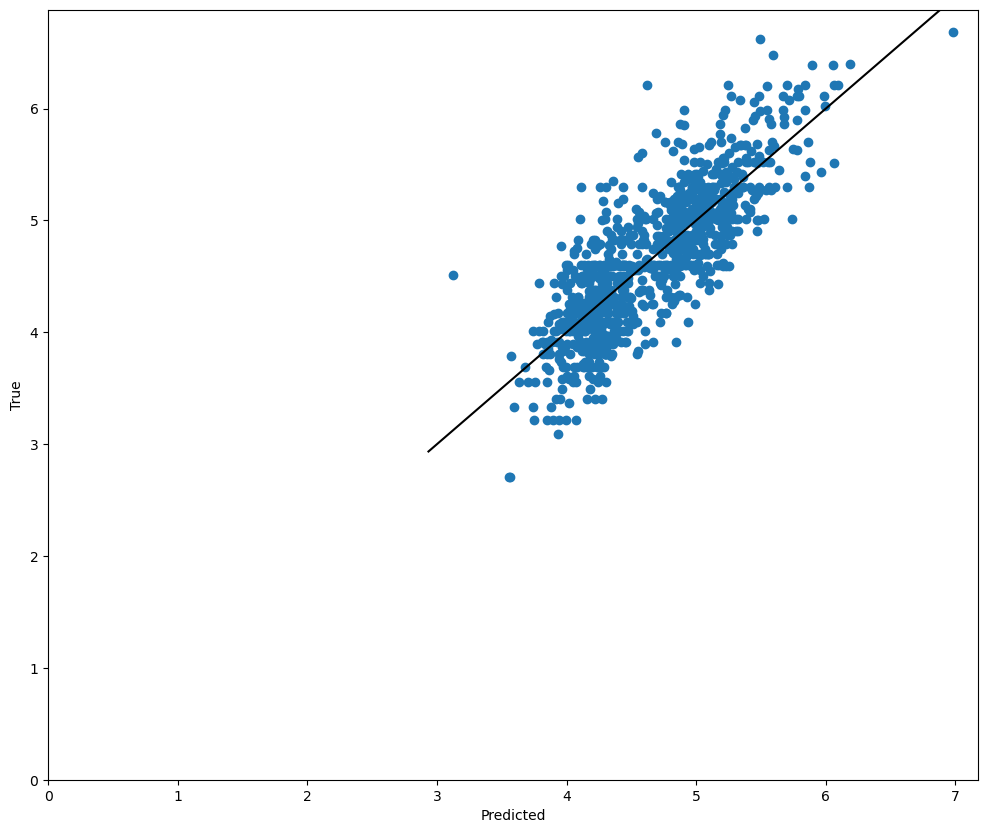

In [90]:
train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_vals, test_vals)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

In [91]:
l = ['zipcode']

cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]

train_zip = onehot(train_x[l[0]], cats_sets[0])
test_zip = onehot(test_x[l[0]], cats_sets[0])

train_vals = np.concatenate((train_vals, train_zip), axis = 1)
test_vals = np.concatenate((test_vals, test_zip), axis = 1)


Train MSE	 0.10655619108066683
Test MSE	 0.11228340147333571


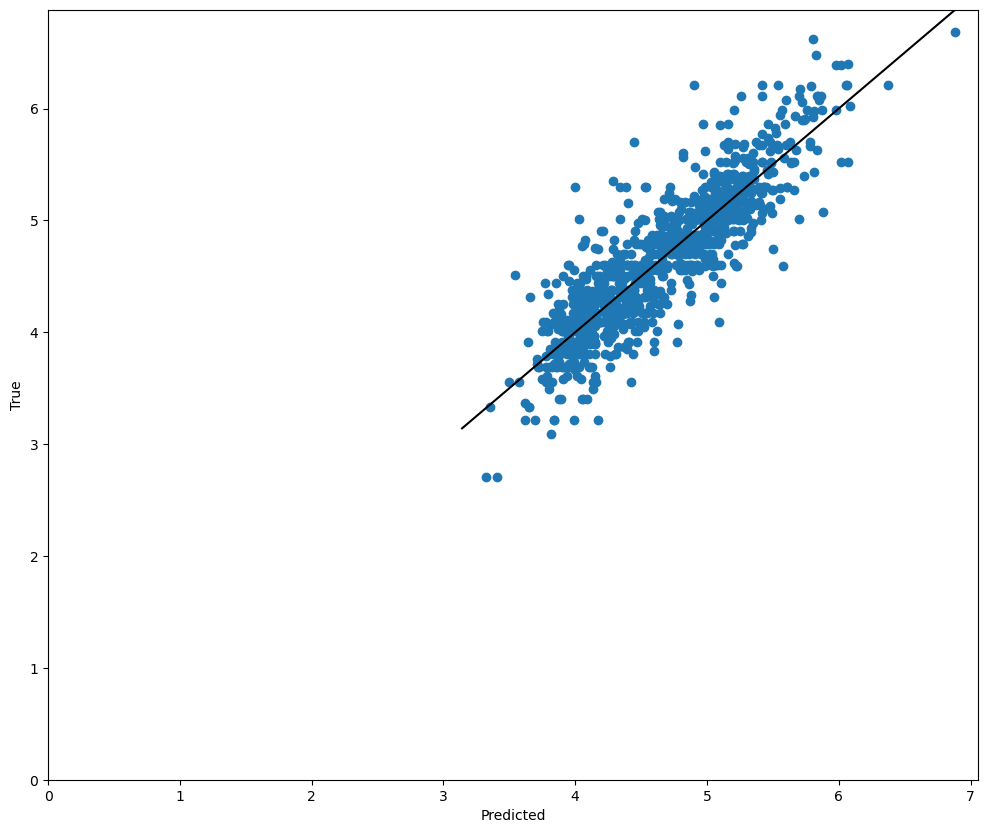

In [92]:
train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_vals, test_vals)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

In [93]:
def logMSE(y, pred):
    return np.mean((np.exp(y)-np.exp(pred))**2)

# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_logOLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = logMSE(train_y, train_pred.flatten())
    test_MSE = logMSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred

In [94]:
train_MSE_all_log = []
test_MSE_all_log = []

# Offset term
offset1 = np.ones((len(train_vals_from_string), 1))
offset2 = np.ones((len(test_vals_from_string), 1))
for i in range(500):
    # Train Test Split
    # Feature space and target column
    target_space = df['price']
    feature_spaces = df.loc[:, ~df.columns.isin(target_space)]
    # Split the dataset into a training set and a test set
    train_x, test_x, train_y, test_y = train_test_split(feature_spaces, target_space, test_size=0.2)
    
    train_y = np.log(train_y)
    test_y = np.log(test_y)
    
    # Real-valued columns
    train_vals_real = np.asarray(train_x.loc[:,labels_real])
    test_vals_real = np.asarray(test_x.loc[:,labels_real])
    # impute NaN values with 0.0 (float valued data)
    train_vals_from_string = train_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
    test_vals_from_string = test_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
    # cast them as np arrays
    train_vals_from_string = np.asarray(train_vals_from_string)
    test_vals_from_string = np.asarray(test_vals_from_string)

    
    # Boolean Data
    train_bv = train_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
    test_bv = test_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
    train_bv = np.asarray(train_bv)
    test_bv = np.asarray(test_bv)

    
    # Categorical Data -> One-hot encoding
    cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]
    train_cat_vals = onehot(train_x[cat_labels[0]], cats_sets[0])
    test_cat_vals = onehot(test_x[cat_labels[0]], cats_sets[0])
    for i in range(1, len(cat_labels)):
        train_cat_vals = np.concatenate((train_cat_vals, onehot(train_x[cat_labels[i]], cats_sets[i])), axis = 1)
        test_cat_vals = np.concatenate((test_cat_vals, onehot(test_x[cat_labels[i]], cats_sets[i])), axis = 1)
    
    
    # Set Data -> Many-hot encoding
    train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
    test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
    vtypes = train_set_vals.explode().unique()
    train_set_vals = manyhot(train_set_vals, vtypes)
    test_set_vals = manyhot(test_set_vals, vtypes)
    

    # Location
    l = ['zipcode']
    cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]
    train_zip = onehot(train_x[l[0]], cats_sets[0])
    test_zip = onehot(test_x[l[0]], cats_sets[0])
    
    
    train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1, train_bv, train_cat_vals, train_set_vals, train_zip), axis = 1)
    test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2, test_bv, test_cat_vals, test_set_vals, test_zip), axis = 1)

    
    train_MSE, test_MSE, test_pred = run_logOLS(train_y, test_y, train_vals, test_vals)
    train_MSE_all_log.append(train_MSE)
    test_MSE_all_log.append(test_MSE)
    

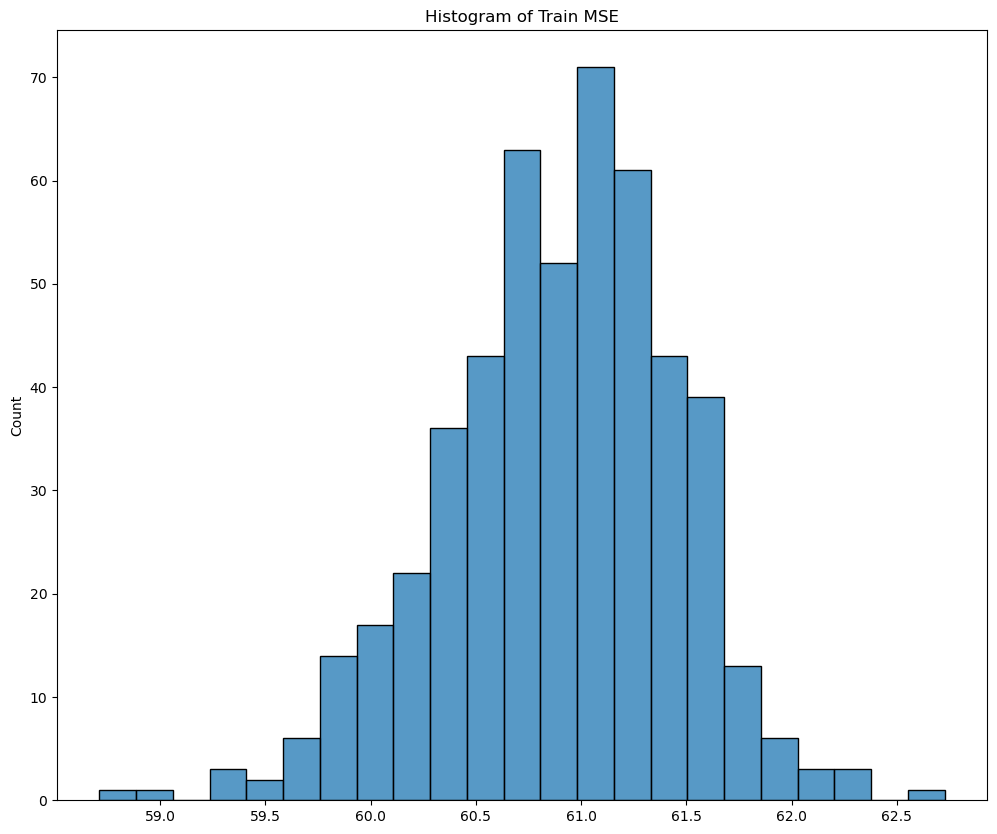

In [95]:
sns.histplot(x = np.sqrt(train_MSE_all_log)).set(title = "Histogram of Train MSE");

In [96]:
test_MSE_alll_log = []
for i in range(len(test_MSE_all_log)):
    if test_MSE_all_log[i] < 7000:
        test_MSE_alll_log.append(test_MSE_all_log[i])

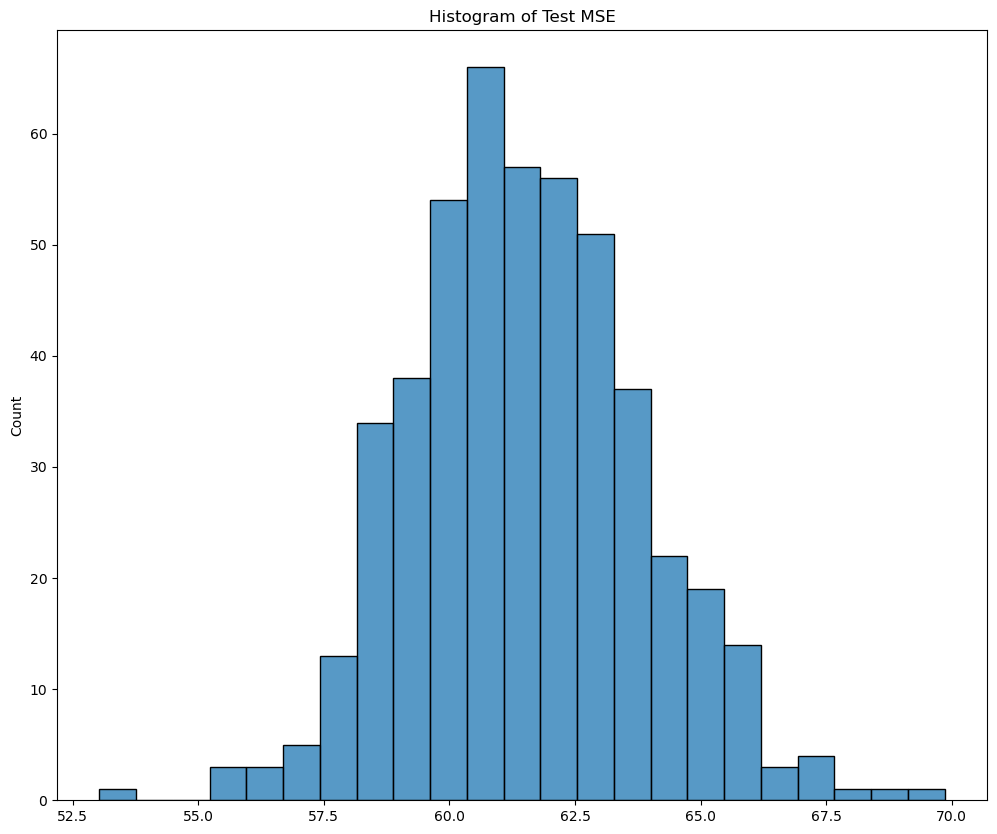

In [97]:
sns.histplot(x = np.sqrt(test_MSE_alll_log)).set(title = "Histogram of Test MSE");

# PCA and K-means

In [ ]:
cols = ['accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month','city','price']

data_std = df.loc[:,cols]
data_std.dropna(inplace = True)

In [ ]:
# Create some data
data_input = data_std.iloc[:,:len(data_std.columns)-2]

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(data_input)

# Scale the data
scaled_data = scaler.transform(data_input)

# Print the scaled data
print(scaled_data)

In [ ]:
# PCA and K-means
PCA_x = PCA(n_components = 2).fit_transform(scaled_data)

In [ ]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(PCA_x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
clf = KMeans(n_clusters=4, init = "k-means++", max_iter = 100, random_state=0).fit(PCA_x)
print(clf.cluster_centers_)

data_std["K-means_label"] = clf.labels_.tolist()
data_std["PCA_label_1"] = PCA_x[:,0].tolist()
data_std["PCA_label_2"] = PCA_x[:,1].tolist()

data_std["city"] = df["city"]
fig = plt.figure()
ax1 = plt.subplot(121)
sns.scatterplot(data_std["PCA_label_1"], data_std["PCA_label_2"], hue = data_std["city"], ax = ax1)

ax2 = plt.subplot(122)
sns.scatterplot(data_std["PCA_label_1"], data_std["PCA_label_2"], hue = data_std["K-means_label"], ax = ax2)
plt.show()

In [ ]:
X_clustered = pd.DataFrame(scaled_data, index = data_input.index, columns = data_input.columns)
X_clustered["cluster"] = clf.labels_

In [ ]:
pd.plotting.parallel_coordinates(X_clustered,"cluster")
plt.xticks(rotation=90)
plt.show()

# RandomForest

In [ ]:
# Offset term
offset1 = np.ones((len(train_vals_from_string), 1))
offset2 = np.ones((len(test_vals_from_string), 1))

# Train Test Split
# Feature space and target column
target_space = np.log(df['price'])
feature_spaces = df.loc[:, ~df.columns.isin(target_space)]
# Split the dataset into a training set and a test set
train_x, test_x, train_y, test_y = train_test_split(feature_spaces, target_space ,test_size=0.2, random_state=42)

# Real-valued columns
train_vals_real = np.asarray(train_x.loc[:,labels_real])
test_vals_real = np.asarray(test_x.loc[:,labels_real])
# impute NaN values with 0.0 (float valued data)
train_vals_from_string = train_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
test_vals_from_string = test_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
# cast them as np arrays
train_vals_from_string = np.asarray(train_vals_from_string)
test_vals_from_string = np.asarray(test_vals_from_string)

train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1), axis=1)
test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2), axis=1)

# Boolean Data
train_bv = train_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
test_bv = test_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
train_bv = np.asarray(train_bv)
test_bv = np.asarray(test_bv)
train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1, train_bv), axis = 1)
test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2, test_bv), axis = 1)

# Categorical Data -> One-hot encoding
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]
train_cat_vals = onehot(train_x[cat_labels[0]], cats_sets[0])
test_cat_vals = onehot(test_x[cat_labels[0]], cats_sets[0])
for i in range(1, len(cat_labels)):
    train_cat_vals = np.concatenate((train_cat_vals, onehot(train_x[cat_labels[i]], cats_sets[i])), axis = 1)
    test_cat_vals = np.concatenate((test_cat_vals, onehot(test_x[cat_labels[i]], cats_sets[i])), axis = 1)
train_vals = np.concatenate((train_vals, train_cat_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_cat_vals), axis = 1)

# Set Data -> Many-hot encoding
train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
train_set_vals = manyhot(train_set_vals, vtypes)
test_set_vals = manyhot(test_set_vals, vtypes)
train_vals = np.concatenate((train_vals, train_set_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_set_vals), axis = 1)

# Location
l = ['zipcode']
cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]
train_zip = onehot(train_x[l[0]], cats_sets[0])
test_zip = onehot(test_x[l[0]], cats_sets[0])
train_vals = np.concatenate((train_vals, train_zip), axis = 1)
test_vals = np.concatenate((test_vals, test_zip), axis = 1)

In [ ]:
X_train = train_vals;
X_test = test_vals;
y_train = np.asarray(train_y).reshape(-1,1);
y_test = np.asarray(test_y).reshape(-1,1);
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
rf = RandomForestRegressor()
n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [10, 50]a
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

In [ ]:
# Be careful!!! This will take more an hour to run this cell.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

In [ ]:
print('Best hyperparameters:', rf_random.best_params_)
y_pred = rf_random.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

In [ ]:
rf = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 50)
rf.fit(X_train, y_train)
rf.feature_importances_
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

# XGboost

In [ ]:
# Offset term
offset1 = np.ones((len(train_vals_from_string), 1))
offset2 = np.ones((len(test_vals_from_string), 1))

# Train Test Split
# Feature space and target column
target_space = np.log(df['price'])
feature_spaces = df.loc[:, ~df.columns.isin(target_space)]
# Split the dataset into a training set and a test set
train_x, test_x, train_y, test_y = train_test_split(feature_spaces, target_space ,test_size=0.2, random_state=42)

# Real-valued columns
train_vals_real = np.asarray(train_x.loc[:,labels_real])
test_vals_real = np.asarray(test_x.loc[:,labels_real])
# impute NaN values with 0.0 (float valued data)
train_vals_from_string = train_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
test_vals_from_string = test_x.loc[:,labels_string].fillna(0).applymap(lambda x: string_to_float(x))
# cast them as np arrays
train_vals_from_string = np.asarray(train_vals_from_string)
test_vals_from_string = np.asarray(test_vals_from_string)

train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1), axis=1)
test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2), axis=1)

# Boolean Data
train_bv = train_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
test_bv = test_x.loc[:,bool_labels].applymap(lambda x: string_to_bool(x))
train_bv = np.asarray(train_bv)
test_bv = np.asarray(test_bv)
train_vals = np.concatenate((train_vals_real, train_vals_from_string, offset1, train_bv), axis = 1)
test_vals = np.concatenate((test_vals_real, test_vals_from_string, offset2, test_bv), axis = 1)

# Categorical Data -> One-hot encoding
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]
train_cat_vals = onehot(train_x[cat_labels[0]], cats_sets[0])
test_cat_vals = onehot(test_x[cat_labels[0]], cats_sets[0])
for i in range(1, len(cat_labels)):
    train_cat_vals = np.concatenate((train_cat_vals, onehot(train_x[cat_labels[i]], cats_sets[i])), axis = 1)
    test_cat_vals = np.concatenate((test_cat_vals, onehot(test_x[cat_labels[i]], cats_sets[i])), axis = 1)
train_vals = np.concatenate((train_vals, train_cat_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_cat_vals), axis = 1)

# Set Data -> Many-hot encoding
train_set_vals = train_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
test_set_vals = test_x.loc[:, 'host_verifications'].apply(lambda x: parse_str(x))
train_set_vals = manyhot(train_set_vals, vtypes)
test_set_vals = manyhot(test_set_vals, vtypes)
train_vals = np.concatenate((train_vals, train_set_vals), axis = 1)
test_vals = np.concatenate((test_vals, test_set_vals), axis = 1)

# Location
l = ['zipcode']
cats_sets = [train_x.loc[:,i].fillna('NaN').unique() for i in l]
train_zip = onehot(train_x[l[0]], cats_sets[0])
test_zip = onehot(test_x[l[0]], cats_sets[0])
train_vals = np.concatenate((train_vals, train_zip), axis = 1)
test_vals = np.concatenate((test_vals, test_zip), axis = 1)

In [ ]:
# Be careful!!! This will take more an hour to run this cell.


# Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 4, 5, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 300, 1000]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print('Best parameters:', grid_search.best_params_)

# Make predictions on the test set with the best model
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print('MSE:', mse)

In [ ]:
xgb_model = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 4, n_estimators = 1000)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, preds)
xgb_model.feature_importances_